# Updated_Sri_lanka_dengue_cases_weather_weekly_2007_2024_.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv('/content/drive/MyDrive/All Data Set/Updated_Sri_lanka_dengue_cases_weather_weekly_2007_2024_.csv')
df.head()

District  Number_of_Cases Week_Start_Date  Month  Year  Week Week_End_Date  \
0   Ampara                0      2007-01-01      1  2007     1    2007-01-08   
1   Ampara                0      2007-01-08      1  2007     2    2007-01-15   
2   Ampara                0      2007-01-15      1  2007     3    2007-01-22   
3   Ampara                0      2007-01-22      1  2007     4    2007-01-29   
4   Ampara                0      2007-01-29      1  2007     5    2007-02-05   

   Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Apparent Max Temp (°C)  \
0            26.9375            21.8625                     28.8500   
1            26.3500            23.3250                     30.2625   
2            27.2125            23.1625                     29.5750   
3            26.7250            23.0375                     29.9500   
4            27.3625            22.9625                     30.7500   

   Avg Apparent Min Temp (°C)  Total Precipitation (mm)  Total Rain (mm)  \
0                     24.1000                       8.0              8.0   
1                     26.7000                      86.1             86.1   
2                     25.9625                       3.1              3.1   
3                     26.1125                      53.6             53.6   
4                     26.1250                       8.2              8.2   

   Avg Wind Speed (km/h)  Max Wind Gusts (km/h)  Weather Code  \
0                18.2000                   44.3             3   
1                17.0250                   43.6            53   
2                20.1875                   48.2            51   
3                17.2000                   42.5            61   
4                17.2625                   40.0            51   

   Avg Daylight Duration (hours)  Avg Sunrise Time  Avg Sunset Time  
0                      11.714583               376             1079  
1                      11.733333               378             1082  
2                      11.754167               380             1085  
3                      11.783333               381             1088  
4                      11.812500               382             1090

In [4]:
df.shape

(22900, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22900 entries, 0 to 22899
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District                       22900 non-null  object 
 1   Number_of_Cases                22900 non-null  int64  
 2   Week_Start_Date                22900 non-null  object 
 3   Month                          22900 non-null  int64  
 4   Year                           22900 non-null  int64  
 5   Week                           22900 non-null  int64  
 6   Week_End_Date                  22900 non-null  object 
 7   Avg Max Temp (°C)              22900 non-null  float64
 8   Avg Min Temp (°C)              22900 non-null  float64
 9   Avg Apparent Max Temp (°C)     22900 non-null  float64
 10  Avg Apparent Min Temp (°C)     22900 non-null  float64
 11  Total Precipitation (mm)       22900 non-null  float64
 12  Total Rain (mm)                22900 non-null 

In [6]:
df.isnull().sum()

District                         0
Number_of_Cases                  0
Week_Start_Date                  0
Month                            0
Year                             0
Week                             0
Week_End_Date                    0
Avg Max Temp (°C)                0
Avg Min Temp (°C)                0
Avg Apparent Max Temp (°C)       0
Avg Apparent Min Temp (°C)       0
Total Precipitation (mm)         0
Total Rain (mm)                  0
Avg Wind Speed (km/h)            0
Max Wind Gusts (km/h)            0
Weather Code                     0
Avg Daylight Duration (hours)    0
Avg Sunrise Time                 0
Avg Sunset Time                  0
dtype: int64

In [7]:
df.describe()

Number_of_Cases         Month          Year          Week  \
count     22900.000000  22900.000000  22900.000000  22900.000000   
mean         34.739607      6.437773   2015.276201     26.222707   
std          87.523903      3.444179      5.073494     15.033863   
min           0.000000      1.000000   2007.000000      1.000000   
25%           2.000000      3.000000   2011.000000     13.000000   
50%           9.000000      6.000000   2015.000000     26.000000   
75%          31.000000      9.000000   2020.000000     39.000000   
max        2631.000000     12.000000   2024.000000     53.000000   

       Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Apparent Max Temp (°C)  \
count       22900.000000       22900.000000                22900.000000   
mean           29.604291          23.525223                   33.941691   
std             3.029898           2.765298                    3.733032   
min            15.600000           7.212500                   13.487500   
25%            28.150000          22.450000                   32.300000   
50%            29.425000          24.025000                   34.125000   
75%            31.412500          25.287500                   36.287500   
max            38.612500          29.262500                   44.337500   

       Avg Apparent Min Temp (°C)  Total Precipitation (mm)  Total Rain (mm)  \
count                22900.000000              22900.000000     22900.000000   
mean                    26.903960                 42.016476        42.016476   
std                      3.588574                 49.655981        49.655981   
min                      4.712500                  0.000000         0.000000   
25%                     25.700000                  7.300000         7.300000   
50%                     27.787500                 24.800000        24.800000   
75%                     29.075000                 59.700000        59.700000   
max                     33.850000                599.000000       599.000000   

       Avg Wind Speed (km/h)  Max Wind Gusts (km/h)  Weather Code  \
count           22900.000000           22900.000000  22900.000000   
mean               16.893420              45.623655     43.264760   
std                 6.180999              12.060575     23.276299   
min                 3.587500              20.900000      0.000000   
25%                12.325000              36.400000     51.000000   
50%                16.025000              43.600000     51.000000   
75%                20.400000              52.900000     61.000000   
max                42.087500             114.100000     65.000000   

       Avg Daylight Duration (hours)  Avg Sunrise Time  Avg Sunset Time  
count                   22900.000000      22900.000000     22900.000000  
mean                       12.126821        363.122402      1090.746725  
std                         0.308234         12.009171        13.634046  
min                        11.558333        344.000000      1061.000000  
25%                        11.835417        354.000000      1080.000000  
50%                        12.129167        359.000000      1095.000000  
75%                        12.418750        372.000000      1100.000000  
max                        12.687500        391.000000      1114.000000

In [8]:
df.columns.to_list()

['District',
 'Number_of_Cases',
 'Week_Start_Date',
 'Month',
 'Year',
 'Week',
 'Week_End_Date',
 'Avg Max Temp (°C)',
 'Avg Min Temp (°C)',
 'Avg Apparent Max Temp (°C)',
 'Avg Apparent Min Temp (°C)',
 'Total Precipitation (mm)',
 'Total Rain (mm)',
 'Avg Wind Speed (km/h)',
 'Max Wind Gusts (km/h)',
 'Weather Code',
 'Avg Daylight Duration (hours)',
 'Avg Sunrise Time',
 'Avg Sunset Time']

# Data Analysis & Visualization

**1.Trend of Dengu Cases**

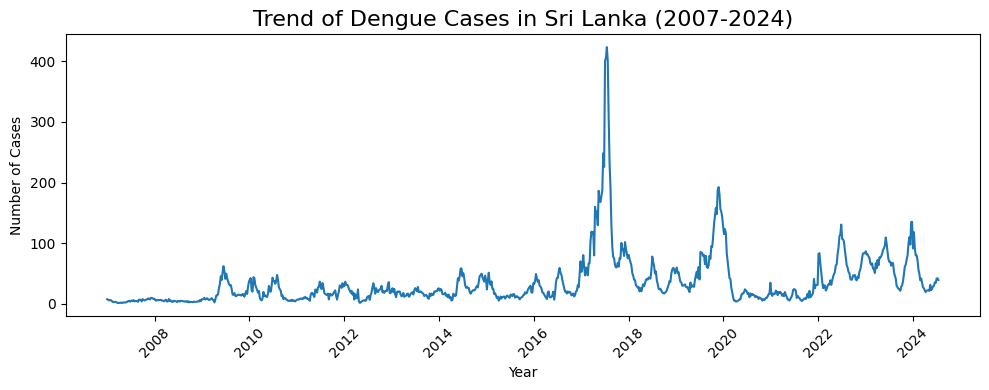

In [9]:

# Convert date columns to datetime format
df['Week_Start_Date'] = pd.to_datetime(df['Week_Start_Date'])
df['Week_End_Date'] = pd.to_datetime(df['Week_End_Date'])

# Plotting the overall trend of dengue cases over time
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='Week_Start_Date', y='Number_of_Cases',errorbar=None)
plt.title('Trend of Dengue Cases in Sri Lanka (2007-2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




*  **Observation** Dengue cases show a significant peak in 2017 with around 10.59k cases. Over the years, the number of cases has fluctuated, with notable surges in specific years and dips in others







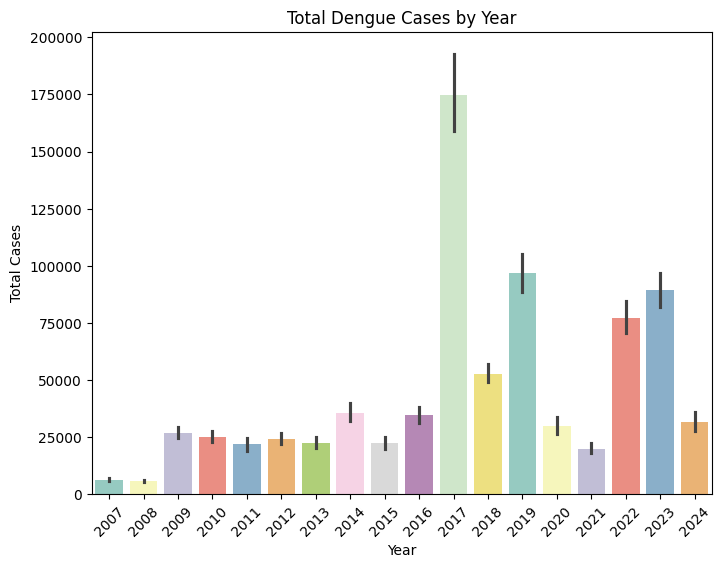

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Number_of_Cases', data=df, estimator=sum,palette='Set3')
plt.title('Total Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)

plt.title('Total Dengue Cases by Year')
plt.xticks(rotation=45)
plt.show()

**Observation:**


*   2017 had the highest number of dengue cases. There were smaller peaks in other years like 2019 and 2021, but no other year matched 2017




**1. Correlation BTW Weather Conditions  &  Dengu Cases**

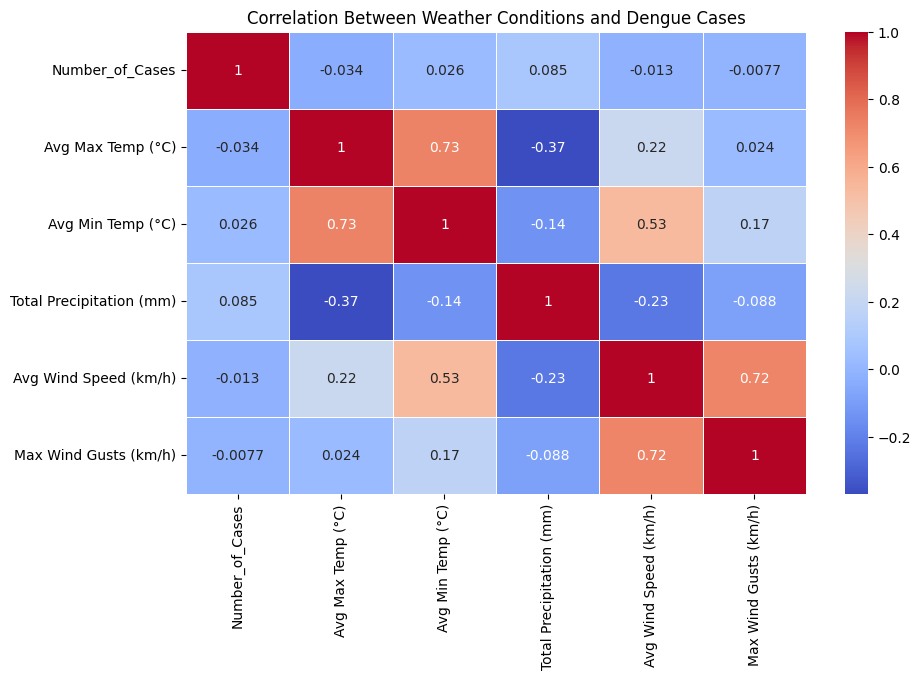

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between weather variables and dengue cases
weather_columns = ['Avg Max Temp (°C)', 'Avg Min Temp (°C)', 'Total Precipitation (mm)',
                   'Avg Wind Speed (km/h)', 'Max Wind Gusts (km/h)']
corr_matrix = df[['Number_of_Cases'] + weather_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Weather Conditions and Dengue Cases')
plt.show()

<Figure size 1200x1000 with 0 Axes>

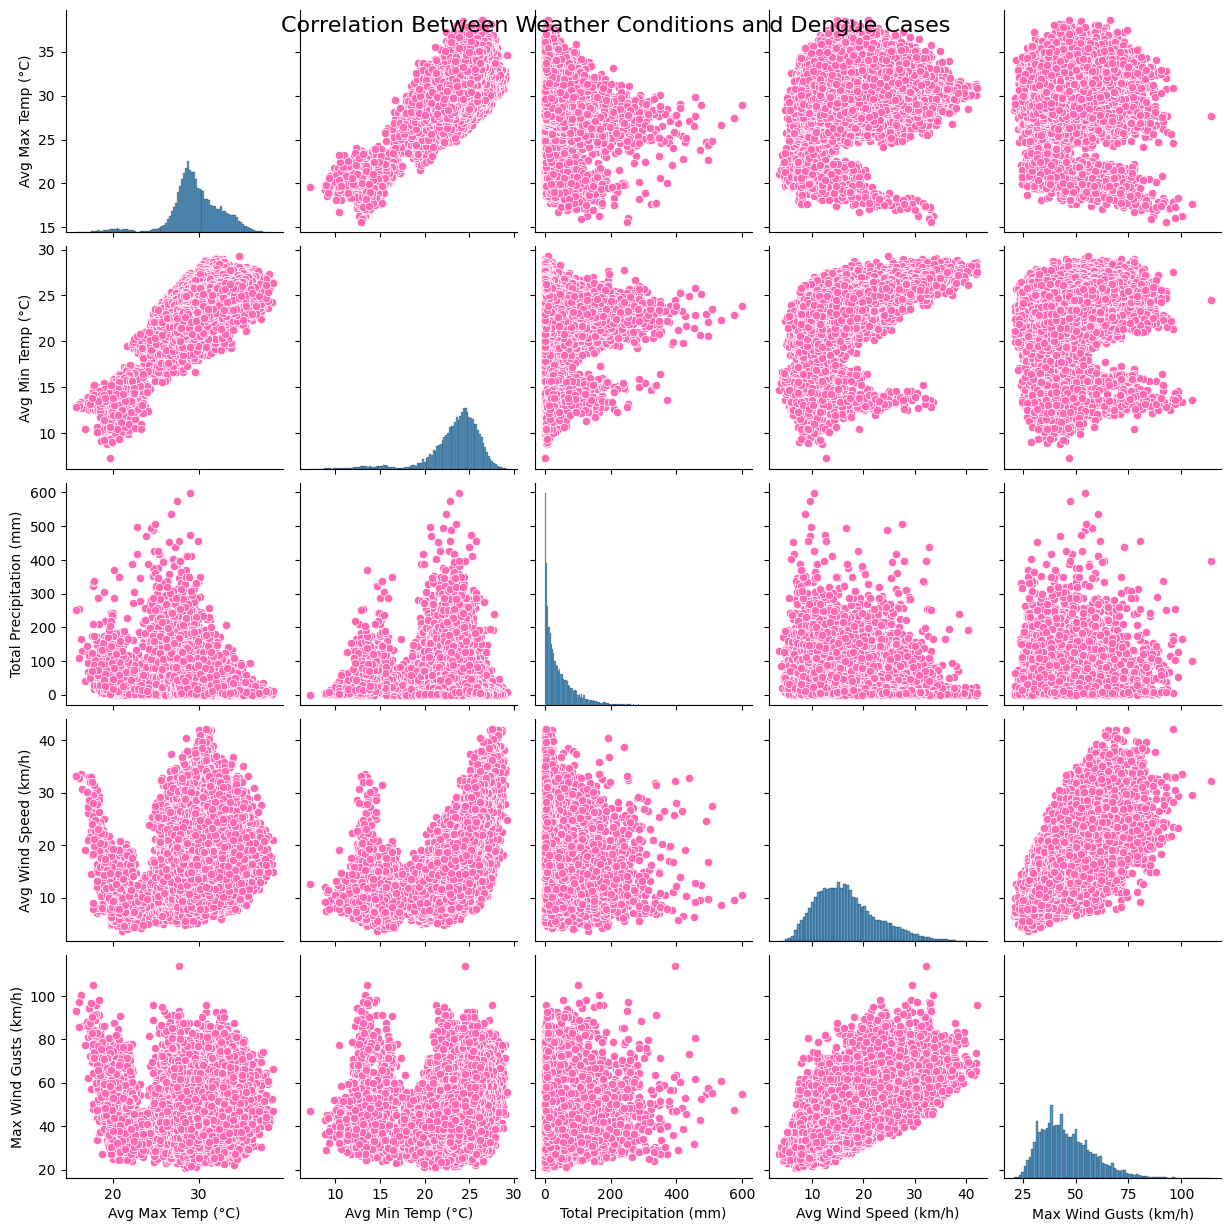

In [12]:
plt.figure(figsize=(12,10))
sns.pairplot(df[['Avg Max Temp (°C)', 'Avg Min Temp (°C)', 'Total Precipitation (mm)',
                   'Avg Wind Speed (km/h)', 'Max Wind Gusts (km/h)']],plot_kws={'color': 'hotpink'})
plt.suptitle('Correlation Between Weather Conditions and Dengue Cases', fontsize=16)
plt.show()

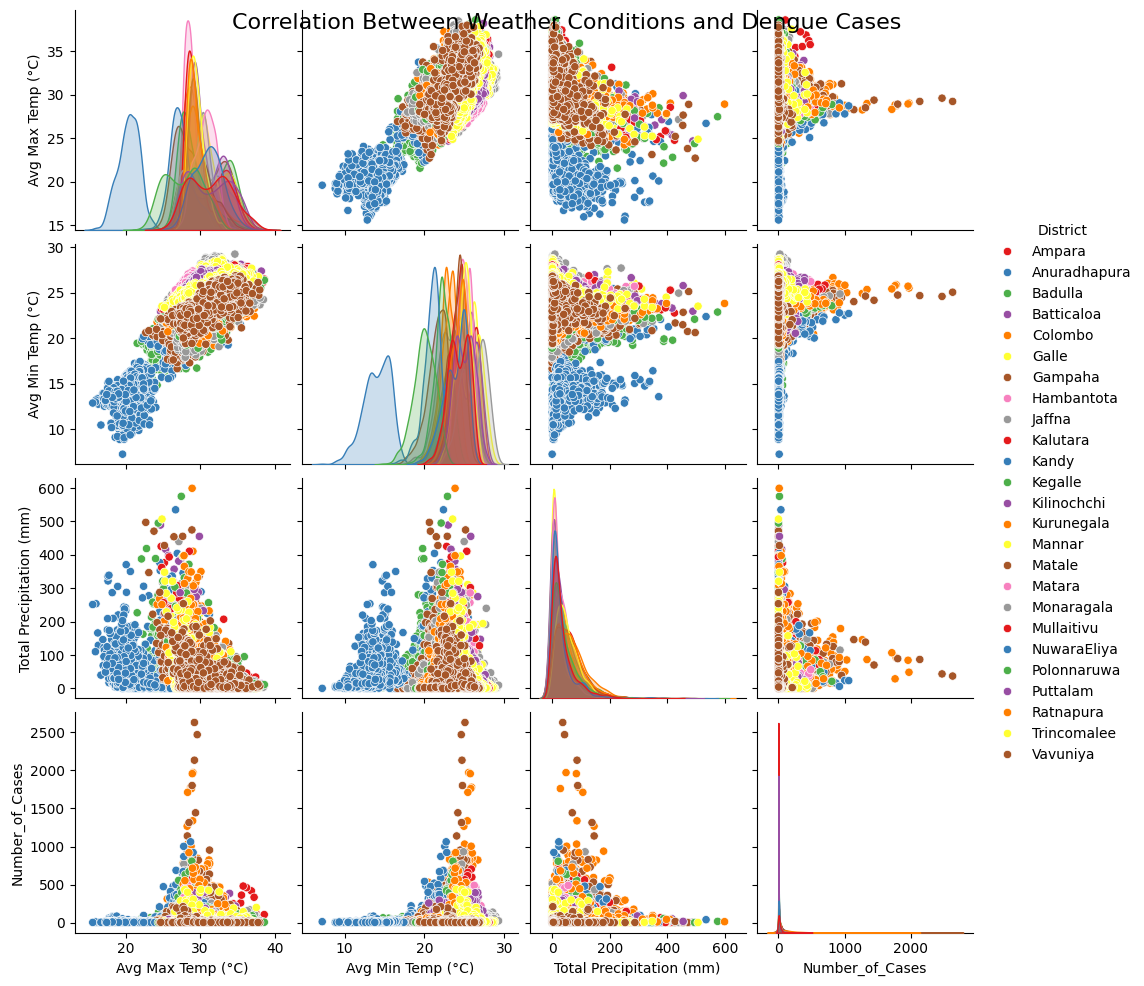

In [13]:
sns.pairplot(df, vars=['Avg Max Temp (°C)', 'Avg Min Temp (°C)', 'Total Precipitation (mm)', 'Number_of_Cases'],
             hue='District', palette='Set1', diag_kind='kde')
plt.suptitle('Correlation Between Weather Conditions and Dengue Cases', fontsize=16)
plt.show()

**3. Effect of Temperature on Dengu cases Across Districts**

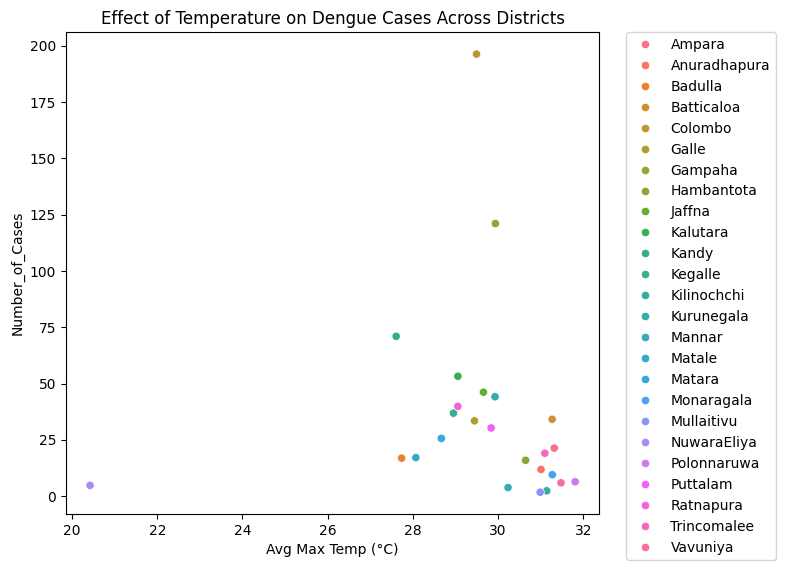

In [14]:
# Group by district and calculate average cases and temperature
district_group = df.groupby('District')[['Number_of_Cases', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)']].mean()

# Visualize temperature vs. cases
plt.figure(figsize=(8, 6))
sns.scatterplot(data=district_group, x='Avg Max Temp (°C)', y='Number_of_Cases', hue=district_group.index)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Effect of Temperature on Dengue Cases Across Districts')
plt.tight_layout()
plt.show()


**4.Model for weekely Dengu cases**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Features and target
features = ['Avg Max Temp (°C)', 'Avg Min Temp (°C)', 'Total Precipitation (mm)', 'Avg Wind Speed (km/h)']
X = df[features]
y = df['Number_of_Cases']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 6316.958207117904


**5.Role of Precipitaition for dengu cases**

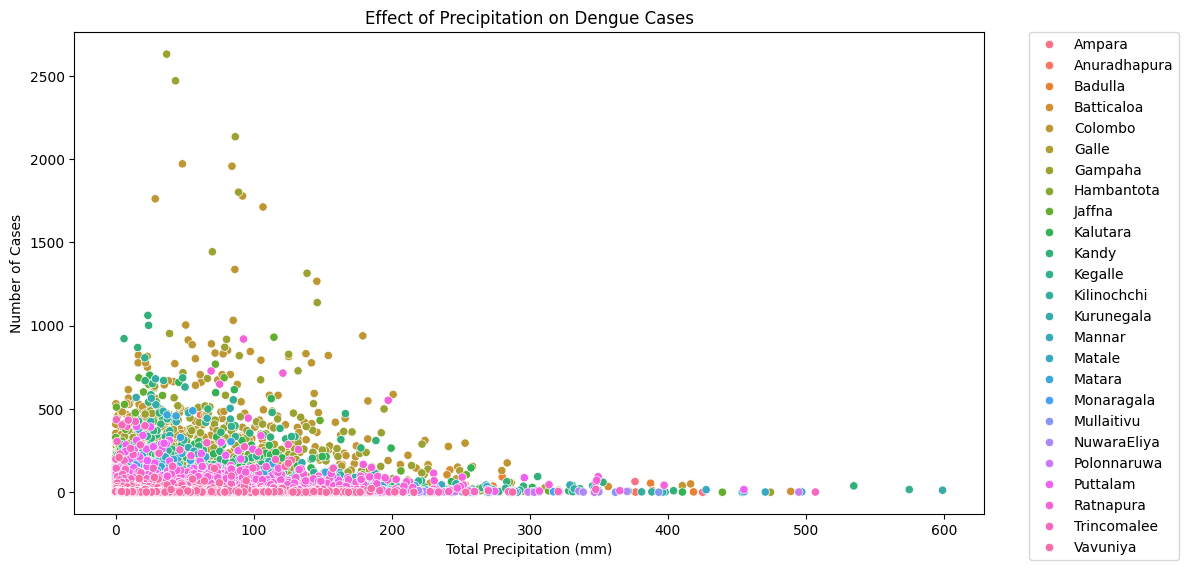

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Total Precipitation (mm)', y='Number_of_Cases', hue='District')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Number of Cases')

plt.title('Effect of Precipitation on Dengue Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


**6. Monthly Dengue Cases Variation Over the Years:**

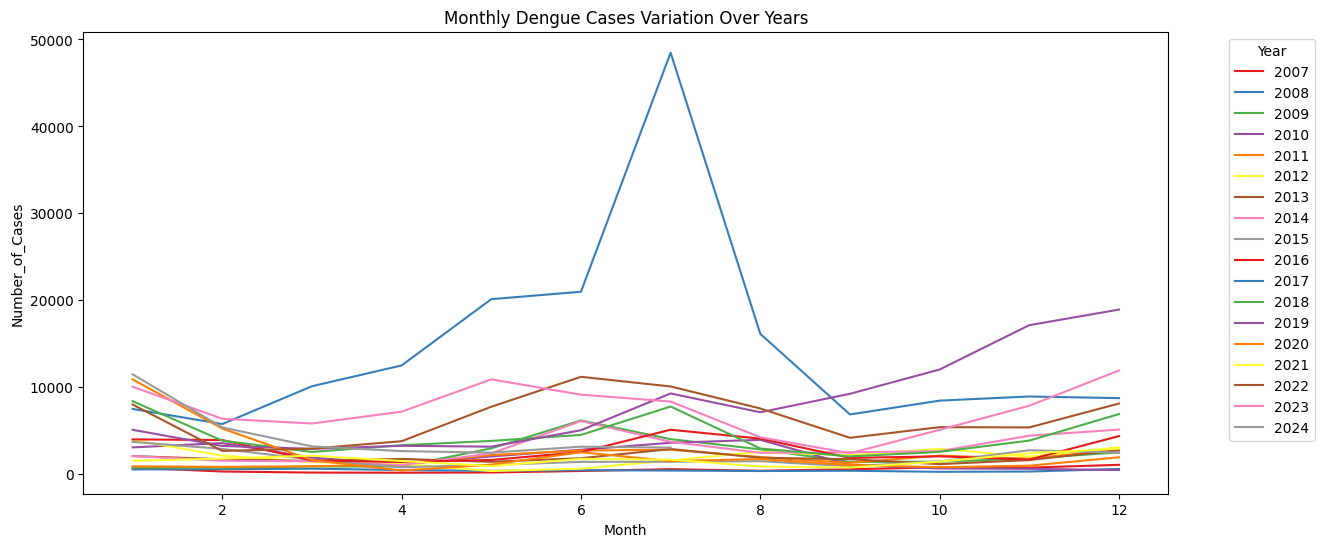

In [17]:
df['Year'] = pd.DatetimeIndex(df['Week_Start_Date']).year
df['Month'] = pd.DatetimeIndex(df['Week_Start_Date']).month

# Group by year and month
monthly_cases = df.groupby(['Year', 'Month'])['Number_of_Cases'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_cases, x='Month', y='Number_of_Cases', hue='Year', palette='Set1')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Monthly Dengue Cases Variation Over Years')
plt.show()


**Observation**:


*   July is consistently the month with the highest dengue cases across multiple years.





**7.Top Environment Factor for Dengu Cases**

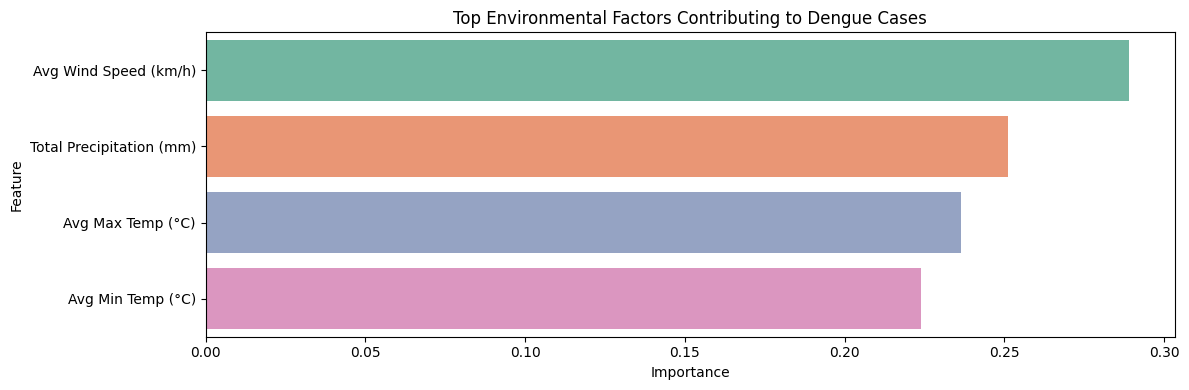

In [18]:
# Feature importance in Random Forest model
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Set2')
plt.title('Top Environmental Factors Contributing to Dengue Cases')
plt.tight_layout()
plt.show()

**8.Long-term dengue trends and the impact of changing weather patterns:**

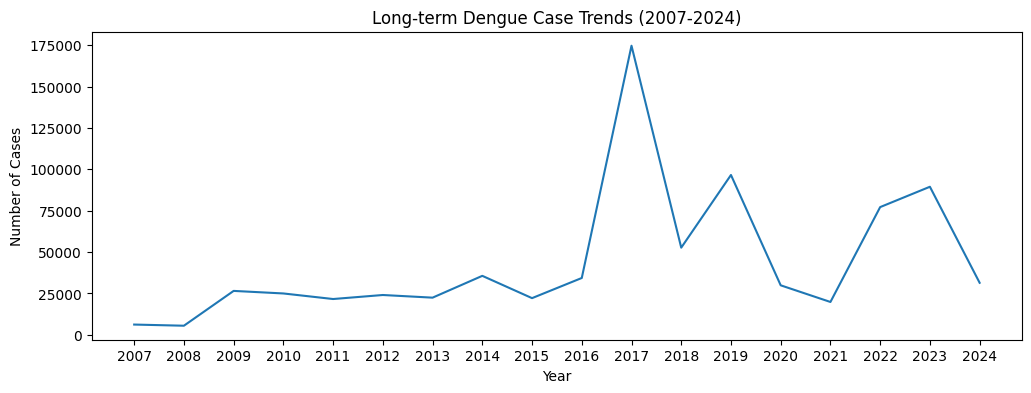

In [19]:
# Aggregate cases by year
yearly_cases = df.groupby('Year')['Number_of_Cases'].sum().reset_index()
plt.figure(figsize=(12,4))
sns.lineplot(data=yearly_cases, x='Year', y='Number_of_Cases')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Long-term Dengue Case Trends (2007-2024)')
plt.xticks(yearly_cases['Year'])
plt.show()

**9.Wind speed correlation with dengue transmission:**

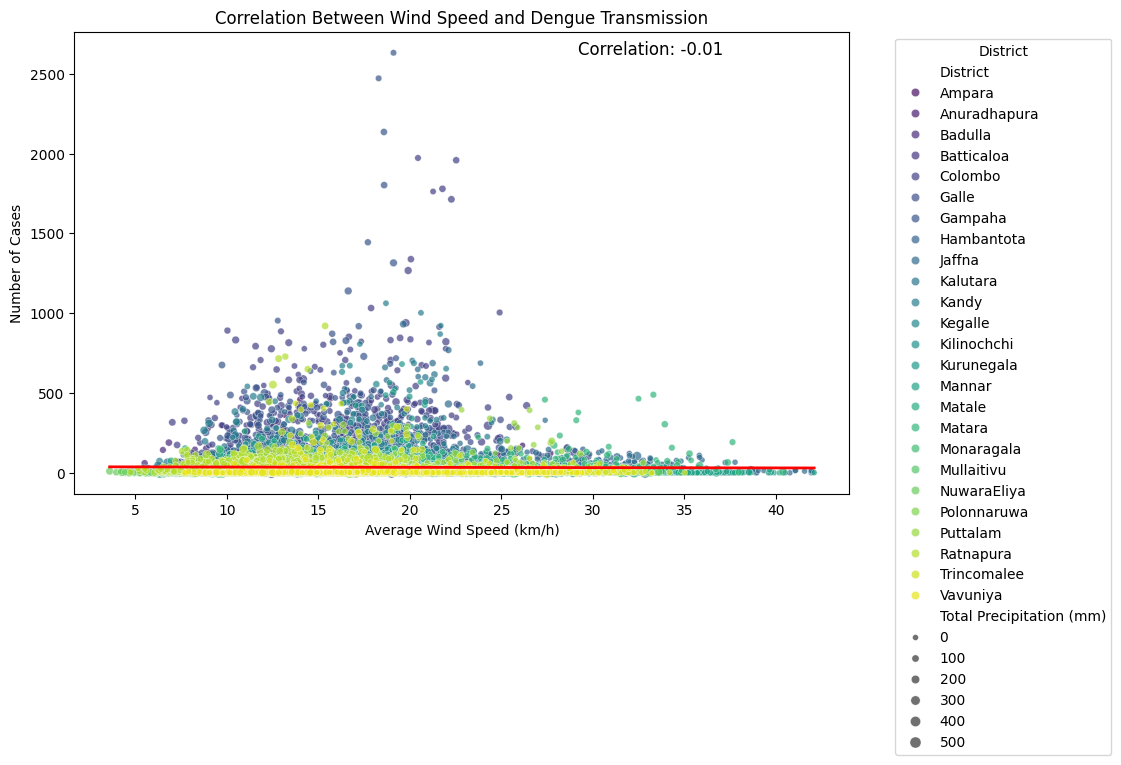

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation between wind speed and number of cases
correlation = df['Avg Wind Speed (km/h)'].corr(df['Number_of_Cases'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Avg Wind Speed (km/h)',
    y='Number_of_Cases',
    hue='District',
    size='Total Precipitation (mm)',
    palette='viridis',
    alpha=0.7,
)

# Add a regression line
sns.regplot(
    data=df,
    x='Avg Wind Speed (km/h)',
    y='Number_of_Cases',
    scatter=False,
    color="red",
    line_kws={'linewidth': 2},
)

# Customize the plot
plt.title('Correlation Between Wind Speed and Dengue Transmission')
plt.xlabel('Average Wind Speed (km/h)')
plt.ylabel('Number of Cases')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the correlation coefficient as an annotation
plt.annotate(
    f'Correlation: {correlation:.2f}',
    xy=(0.65, 0.95),
    xycoords='axes fraction',
    fontsize=12,
)

plt.show()

**10.Weather anomalies and dengue surges**

In [21]:
# Calculate weather anomalies (replace this with your actual anomaly calculation)
df['Weather_Anomalies'] = df['Avg Max Temp (°C)'] - df['Avg Max Temp (°C)'].mean()

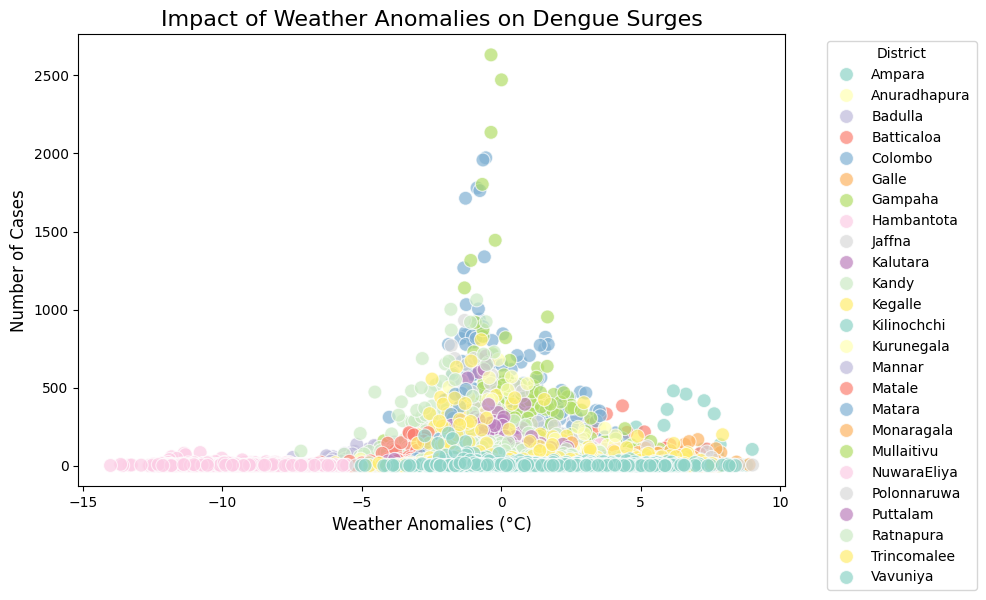

In [23]:
# Calculate weather anomalies (replace this with your actual anomaly calculation)
df['Weather_Anomalies'] = df['Avg Max Temp (°C)'] - df['Avg Max Temp (°C)'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weather_Anomalies', y='Number_of_Cases', hue='District', palette='Set3', s=100, alpha=0.7)
plt.title('Impact of Weather Anomalies on Dengue Surges', fontsize=16)
plt.xlabel('Weather Anomalies (°C)', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

**10.a Districts most at risk for future outbreaks**

In [24]:
# Ranking districts based on the average number of cases
district_risk = df.groupby('District')['Number_of_Cases'].mean().reset_index().sort_values(by='Number_of_Cases', ascending=False)

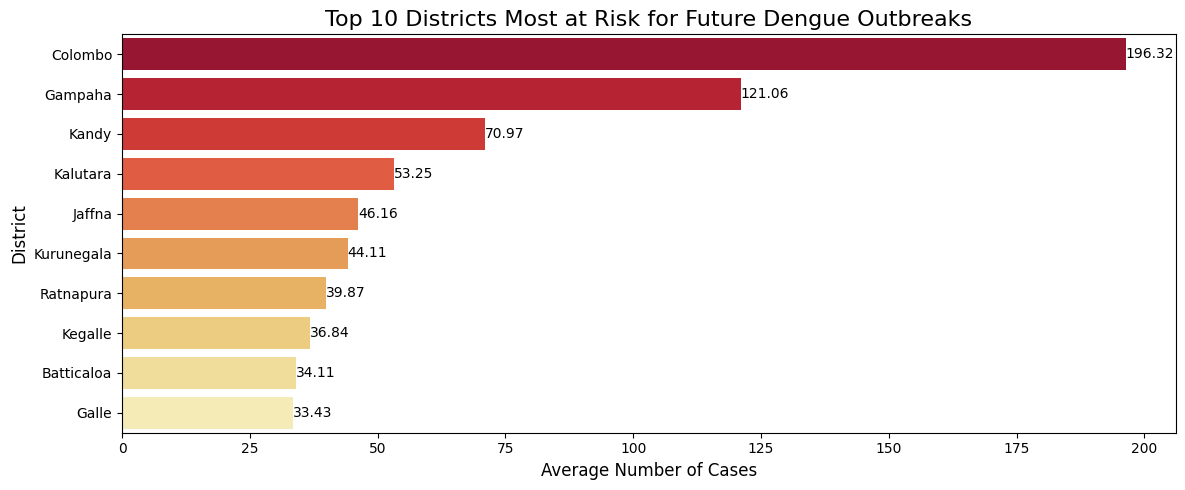

In [25]:


plt.figure(figsize=(12, 5))
sns.barplot(data=district_risk.head(10), x='Number_of_Cases', y='District', palette='YlOrRd_r')
plt.title('Top 10 Districts Most at Risk for Future Dengue Outbreaks', fontsize=16)
plt.xlabel('Average Number of Cases', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i, v in enumerate(district_risk['Number_of_Cases'].head(10)):
    plt.text(v, i, f'{v:.2f}', ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

**Observation:**

*    Colombo, Gampaha, and Kalutara are the districts with the highest average number of cases, making them the most vulnerable for future outbreaks.


**Insight:**  These districts may require more focused public health interventions and preventive measures.

In [26]:
# Calculate average number of cases for each district
district_cases = df.groupby('District')['Number_of_Cases'].mean().reset_index()

# Select top 5 districts with highest and lowest average cases
top_5 = district_cases.sort_values(by='Number_of_Cases', ascending=False).head(5)
bottom_5 = district_cases.sort_values(by='Number_of_Cases', ascending=True).head(5)

# Combine the top and bottom districts
combined_districts = pd.concat([top_5, bottom_5])

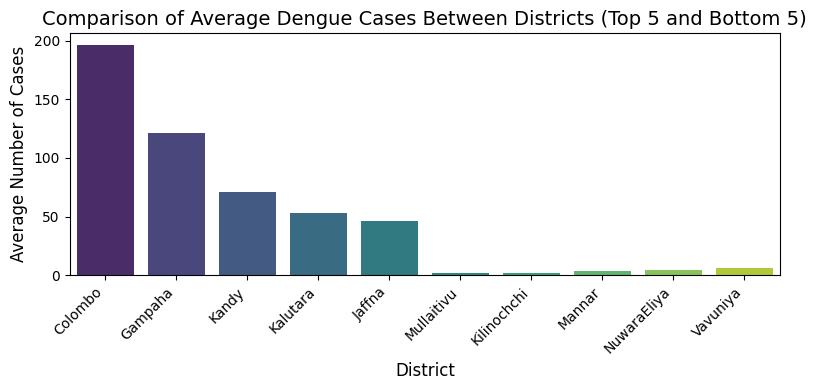

In [27]:


# Create the bar plot
plt.figure(figsize=(8, 4))
sns.barplot(data=combined_districts, x='District', y='Number_of_Cases', palette='viridis')
plt.title('Comparison of Average Dengue Cases Between Districts (Top 5 and Bottom 5)', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Average Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**11.Impact of daylight hours on dengue spread**

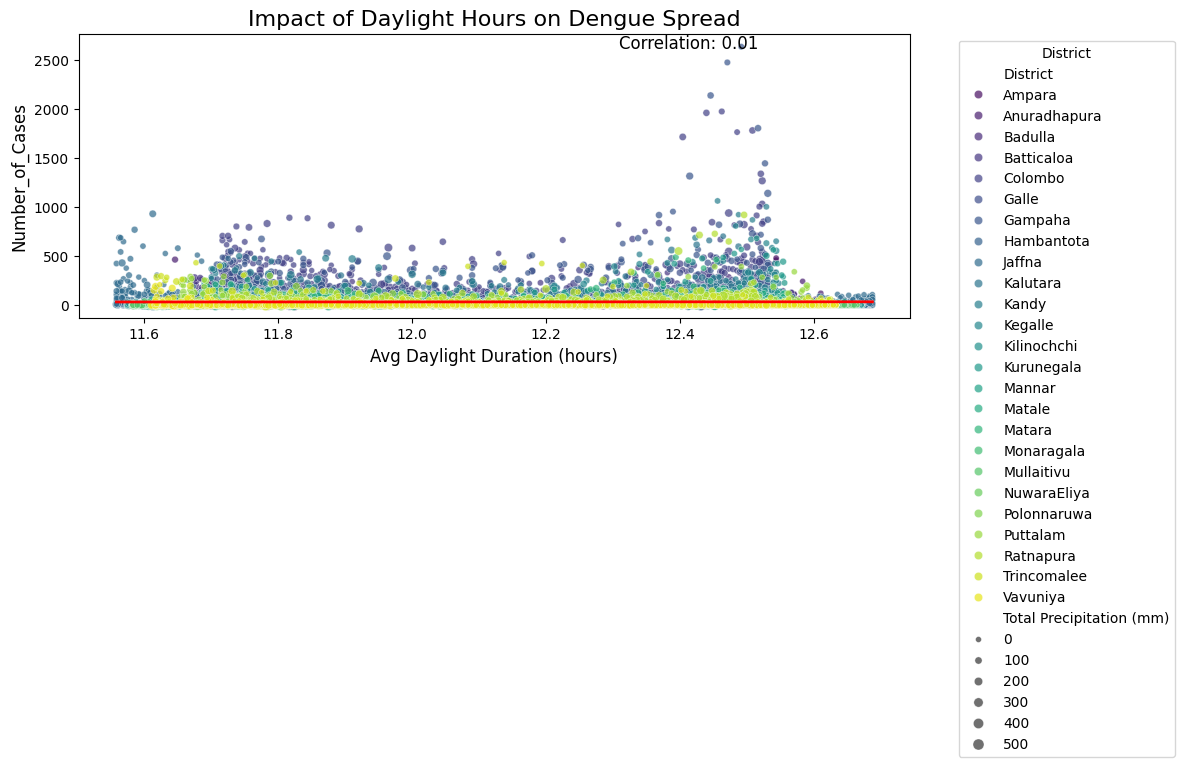

In [28]:
# Calculate the correlation
correlation = df['Avg Daylight Duration (hours)'].corr(df['Number_of_Cases'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Avg Daylight Duration (hours)', y='Number_of_Cases', hue='District', palette='viridis', size='Total Precipitation (mm)', alpha=0.7)
plt.title('Impact of Daylight Hours on Dengue Spread', fontsize=16)
plt.xlabel('Avg Daylight Duration (hours)', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)

# Add regression line
sns.regplot(data=df, x='Avg Daylight Duration (hours)', y='Number_of_Cases', scatter=False, color='red', line_kws={'linewidth': 2})

# Add correlation coefficient as annotation
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)

plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

**12.Effect of precipitation on dengue cases:**

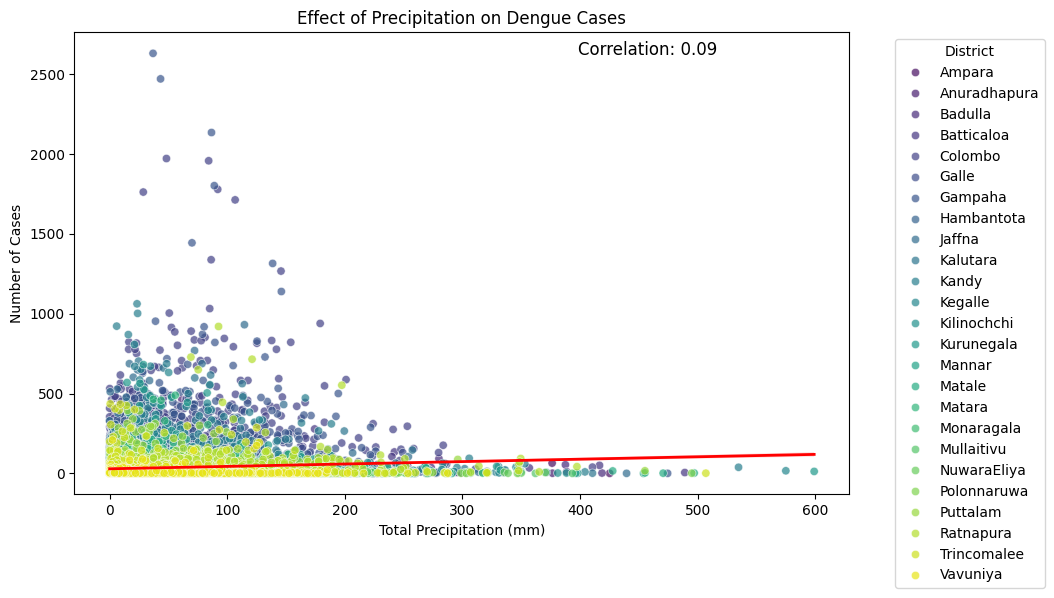

In [29]:
# Calculate the correlation between precipitation and number of cases
correlation = df['Total Precipitation (mm)'].corr(df['Number_of_Cases'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Total Precipitation (mm)',
    y='Number_of_Cases',
    hue='District',
    palette='viridis',
    alpha=0.7,
)

# Add a regression line
sns.regplot(
    data=df,
    x='Total Precipitation (mm)',
    y='Number_of_Cases',
    scatter=False,
    color="red",
    line_kws={'linewidth': 2},
)

# Customize the plot
plt.title('Effect of Precipitation on Dengue Cases')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Number of Cases')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the correlation coefficient as an annotation
plt.annotate(
    f'Correlation: {correlation:.2f}',
    xy=(0.65, 0.95),
    xycoords='axes fraction',
    fontsize=12,
)

plt.show()

**13.Key months for dengue outbreaks**

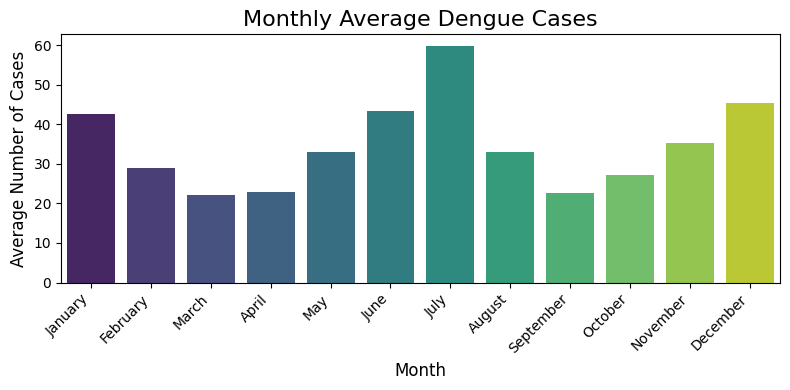

In [30]:
import calendar

monthly_cases = df.groupby('Month')['Number_of_Cases'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=monthly_cases, x='Month', y='Number_of_Cases', palette='viridis')
plt.title('Monthly Average Dengue Cases', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Number of Cases', fontsize=12)
plt.xticks(ticks=range(12), labels=[calendar.month_name[i] for i in range(1, 13)], rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()





**Observation:**     
July consistently shows the highest average dengue cases






 **14.Clustering districts with similar dengue and weather patterns**

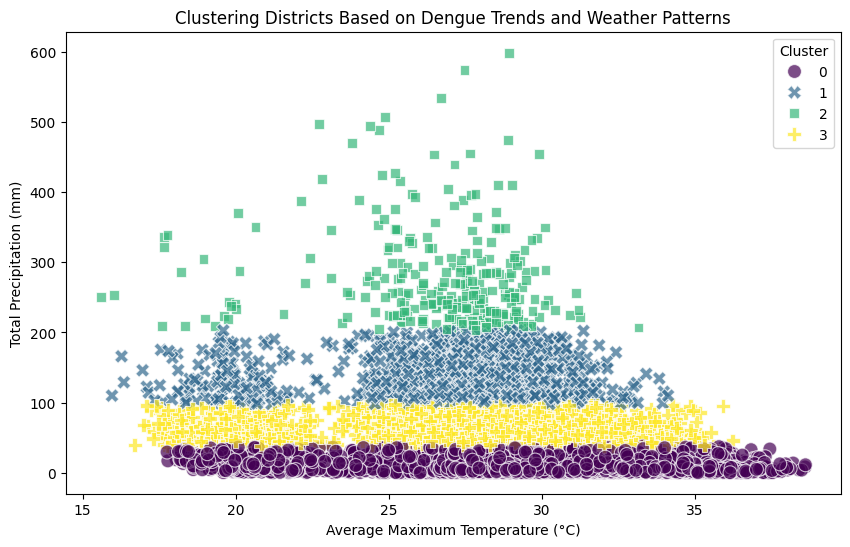

In [31]:
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = ['Avg Max Temp (°C)', 'Avg Min Temp (°C)', 'Total Precipitation (mm)', 'Avg Wind Speed (km/h)']

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Avg Max Temp (°C)', y='Total Precipitation (mm)', hue='Cluster', palette='viridis', style='Cluster', s=100, alpha=0.7)
plt.title('Clustering Districts Based on Dengue Trends and Weather Patterns')
plt.xlabel('Average Maximum Temperature (°C)')
plt.ylabel('Total Precipitation (mm)')
plt.legend(title='Cluster')
plt.show()

**15.Dengue cases in high vs low precipitation districts:**

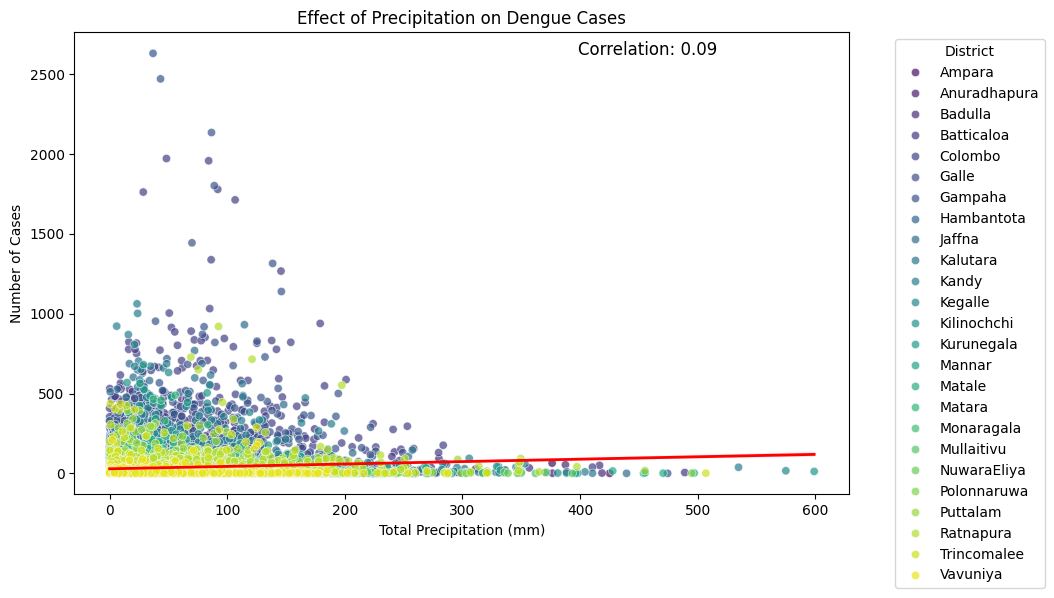

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation between precipitation and number of cases
correlation = df['Total Precipitation (mm)'].corr(df['Number_of_Cases'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Total Precipitation (mm)',
    y='Number_of_Cases',
    hue='District',
    palette='viridis',
    alpha=0.7,
)

# Add a regression line
sns.regplot(
    data=df,
    x='Total Precipitation (mm)',
    y='Number_of_Cases',
    scatter=False,
    color="red",
    line_kws={'linewidth': 2},
)

# Customize the plot
plt.title('Effect of Precipitation on Dengue Cases')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Number of Cases')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the correlation coefficient as an annotation
plt.annotate(
    f'Correlation: {correlation:.2f}',
    xy=(0.65, 0.95),
    xycoords='axes fraction',
    fontsize=12,
)

plt.show()

**16.Total annual rainfall vs dengue cases:**

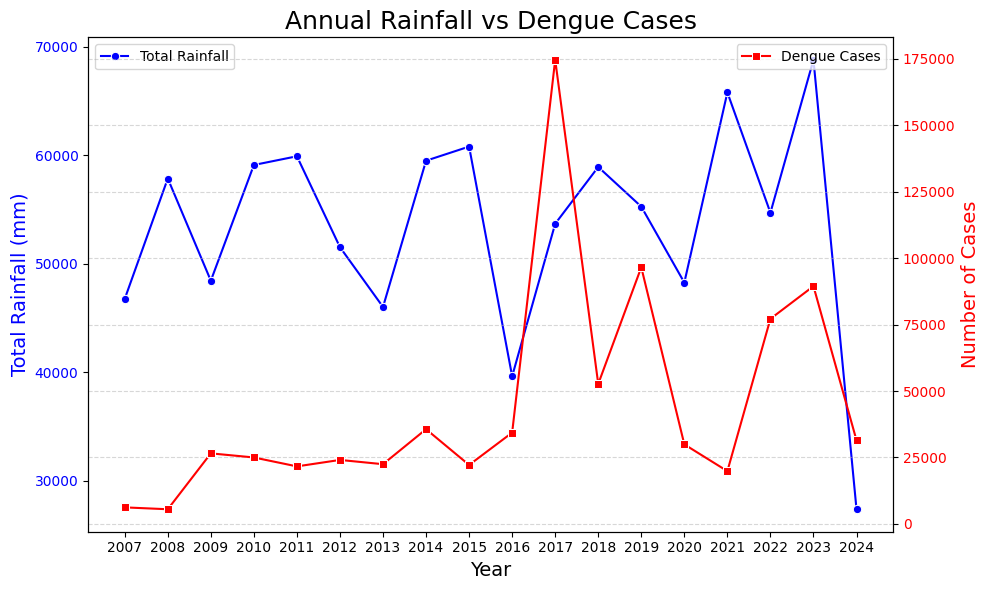

In [33]:
annual_rainfall_cases = df.groupby('Year')[['Total Precipitation (mm)', 'Number_of_Cases']].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total rainfall on the first y-axis
sns.lineplot(data=annual_rainfall_cases, x='Year', y='Total Precipitation (mm)', label='Total Rainfall', color='blue', marker='o', ax=ax1)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Total Rainfall (mm)', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot dengue cases on the second y-axis
sns.lineplot(data=annual_rainfall_cases, x='Year', y='Number_of_Cases', label='Dengue Cases', color='red', marker='s', ax=ax2)
ax2.set_ylabel('Number of Cases', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Annual Rainfall vs Dengue Cases', fontsize=18)
plt.xticks(annual_rainfall_cases['Year'], rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

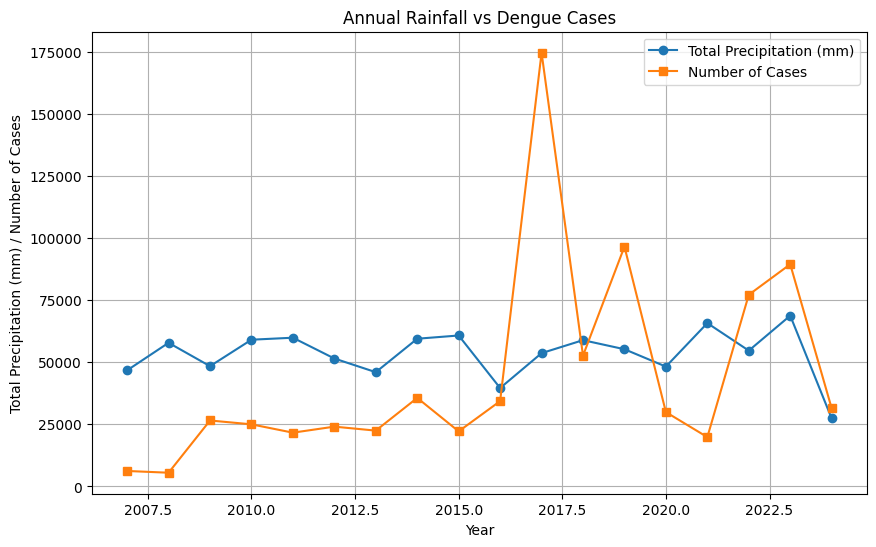

In [34]:
# Calculate the yearly sum of precipitation and cases
annual_data = df.groupby('Year').agg({'Total Precipitation (mm)': 'sum', 'Number_of_Cases': 'sum'}).reset_index()

# Create the line plot with matplotlib
plt.figure(figsize=(10, 6))

plt.plot(annual_data['Year'], annual_data['Total Precipitation (mm)'], label='Total Precipitation (mm)', marker='o')
plt.plot(annual_data['Year'], annual_data['Number_of_Cases'], label='Number of Cases', marker='s')

plt.title('Annual Rainfall vs Dengue Cases')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm) / Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

**Observation:**    In years with higher total rainfall, the number of dengue cases also tends to rise.



**17.Differences in Dengue Cases Between High-Precipitation vs. Low-Precipitation Districts**

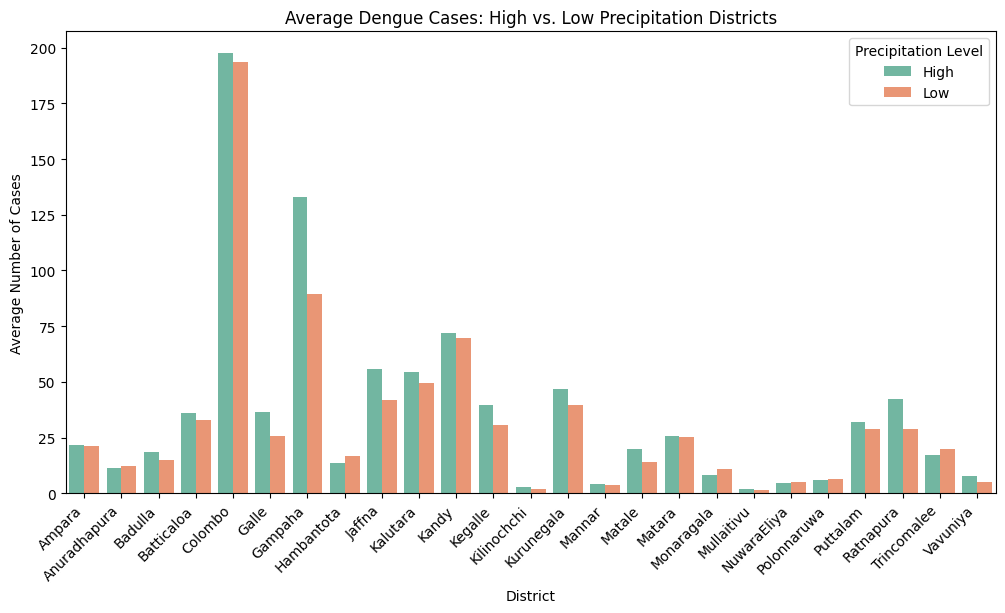

In [35]:
# Calculate median precipitation
median_precipitation = df['Total Precipitation (mm)'].median()

# Create a new column for precipitation level
df['Precipitation Level'] = df['Total Precipitation (mm)'].apply(lambda x: 'High' if x > median_precipitation else 'Low')

# Group data by precipitation level and district, then calculate average cases
precipitation_cases = df.groupby(['Precipitation Level', 'District'])['Number_of_Cases'].mean().reset_index()

# Create a bar plot to compare average cases across districts for each precipitation level
plt.figure(figsize=(12, 6))
sns.barplot(data=precipitation_cases, x='District', y='Number_of_Cases', hue='Precipitation Level', palette='Set2')
plt.title('Average Dengue Cases: High vs. Low Precipitation Districts')
plt.xlabel('District')
plt.ylabel('Average Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.show()

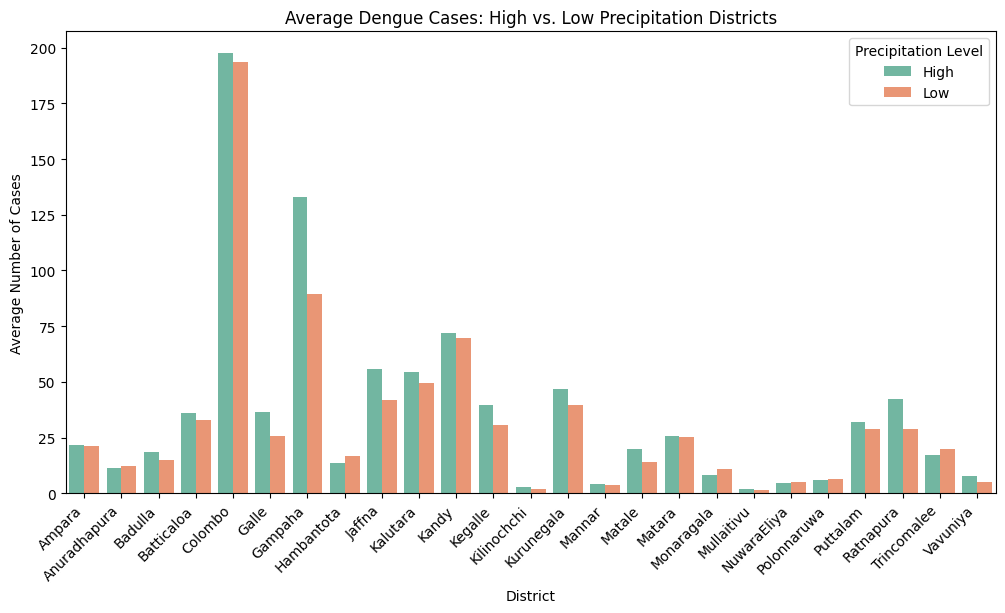

In [36]:
# Calculate median precipitation
median_precipitation = df['Total Precipitation (mm)'].median()

# Create a new column for precipitation level
df['Precipitation Level'] = df['Total Precipitation (mm)'].apply(lambda x: 'High' if x > median_precipitation else 'Low')

# Group data by precipitation level and district, then calculate average cases
precipitation_cases = df.groupby(['Precipitation Level', 'District'])['Number_of_Cases'].mean().reset_index()

# Create a bar plot to compare average cases across districts for each precipitation level
plt.figure(figsize=(12, 6))
sns.barplot(data=precipitation_cases, x='District', y='Number_of_Cases', hue='Precipitation Level', palette='Set2')
plt.title('Average Dengue Cases: High vs. Low Precipitation Districts')
plt.xlabel('District')
plt.ylabel('Average Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.show()

**18.How does the total annual rainfall relate to the number of dengue cases for a given year?**

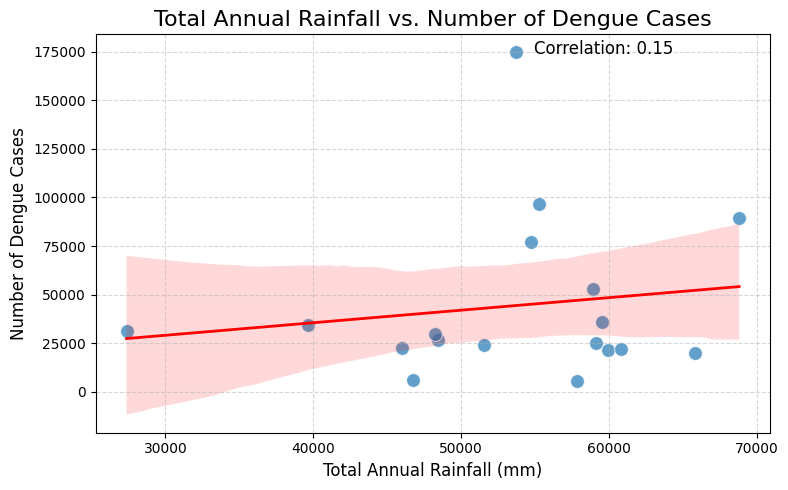

In [37]:
# Calculate annual rainfall and dengue cases
annual_data = df.groupby('Year').agg({'Total Precipitation (mm)': 'sum', 'Number_of_Cases': 'sum'}).reset_index()

# Calculate correlation coefficient
correlation = annual_data['Total Precipitation (mm)'].corr(annual_data['Number_of_Cases'])

# Create scatter plot with trend line and annotations
plt.figure(figsize=(8, 5))
sns.scatterplot(data=annual_data, x='Total Precipitation (mm)', y='Number_of_Cases', s=100, alpha=0.7)
sns.regplot(data=annual_data, x='Total Precipitation (mm)', y='Number_of_Cases', scatter=False, color='red', line_kws={'linewidth': 2})

# Annotate correlation coefficient
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)

plt.title('Total Annual Rainfall vs. Number of Dengue Cases', fontsize=16)
plt.xlabel('Total Annual Rainfall (mm)', fontsize=12)
plt.ylabel('Number of Dengue Cases', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**19.What is the relationship between temperature fluctuations and dengue outbreaks across different seasons?**

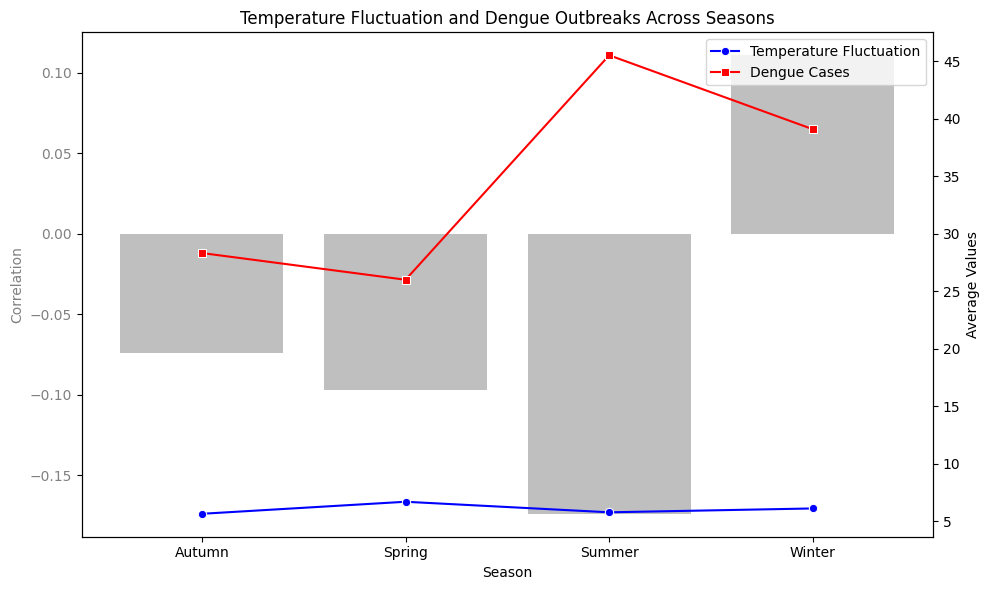

In [38]:
# Create a 'Season' column based on 'Month'
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Autumn')

# Calculate temperature fluctuations (example calculation)
df['Temperature Fluctuation'] = df['Avg Max Temp (°C)'] - df['Avg Min Temp (°C)']

# Group data by season and calculate average values
seasonal_data = df.groupby('Season').agg({'Temperature Fluctuation': 'mean', 'Number_of_Cases': 'mean'}).reset_index()

# Calculate correlation coefficients for each season
correlations = df.groupby('Season').apply(lambda x: x['Temperature Fluctuation'].corr(x['Number_of_Cases'])).reset_index(name='Correlation')

# Merge correlation data with seasonal_data
seasonal_data = pd.merge(seasonal_data, correlations, on='Season')

# Create a bar plot for correlations and line plots for averages with interactive elements
import plotly.graph_objects as go

fig = go.Figure()

# Bar plot for correlations
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Correlation
sns.barplot(x=seasonal_data['Season'], y=seasonal_data['Correlation'], color='gray', alpha=0.5, ax=ax1)
ax1.set_xlabel('Season')
ax1.set_ylabel('Correlation', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# Create a second y-axis
ax2 = ax1.twinx()

# Line plot for Temperature Fluctuation
sns.lineplot(x=seasonal_data['Season'], y=seasonal_data['Temperature Fluctuation'], marker='o', color='blue', label='Temperature Fluctuation', ax=ax2)

# Line plot for Dengue Cases
sns.lineplot(x=seasonal_data['Season'], y=seasonal_data['Number_of_Cases'], marker='s', color='red', label='Dengue Cases', ax=ax2)

ax2.set_ylabel('Average Values', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Temperature Fluctuation and Dengue Outbreaks Across Seasons')
plt.tight_layout()
plt.show()

**20.Relationship btw AVG temperature and Dengu Cases**

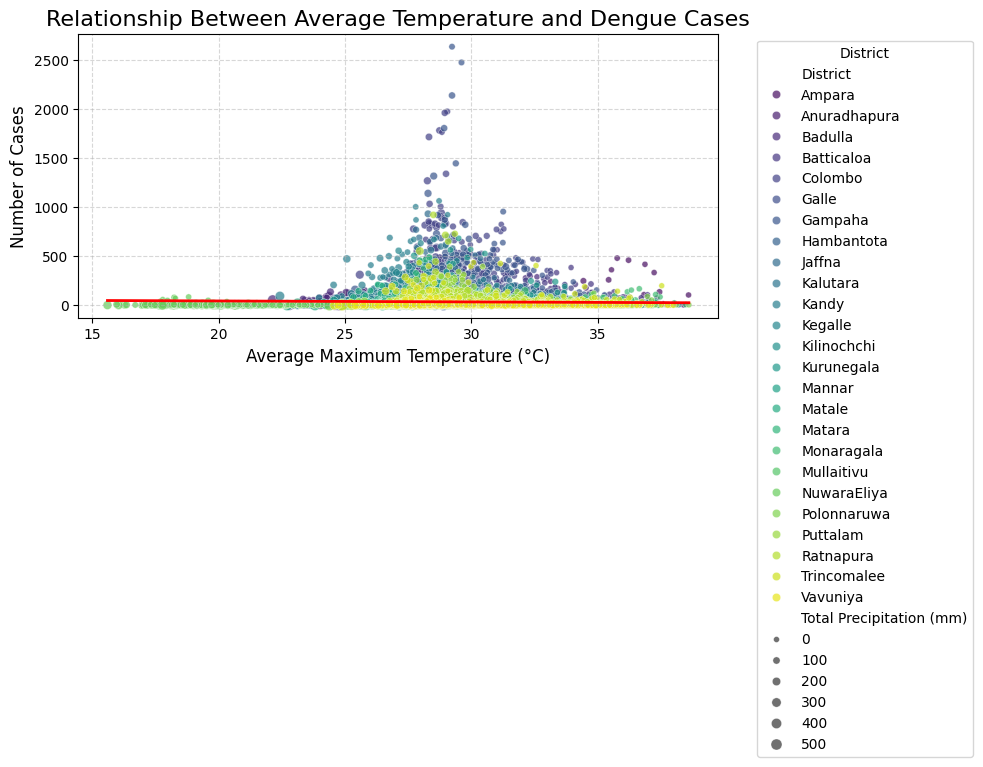

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Avg Max Temp (°C)', y='Number_of_Cases', size='Total Precipitation (mm)', hue='District', palette='viridis', alpha=0.7)
sns.regplot(data=df, x='Avg Max Temp (°C)', y='Number_of_Cases', scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('Relationship Between Average Temperature and Dengue Cases', fontsize=16)
plt.xlabel('Average Maximum Temperature (°C)', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**21.Relationship btw Temperature ,Precipation ,and  Dengu Cases**

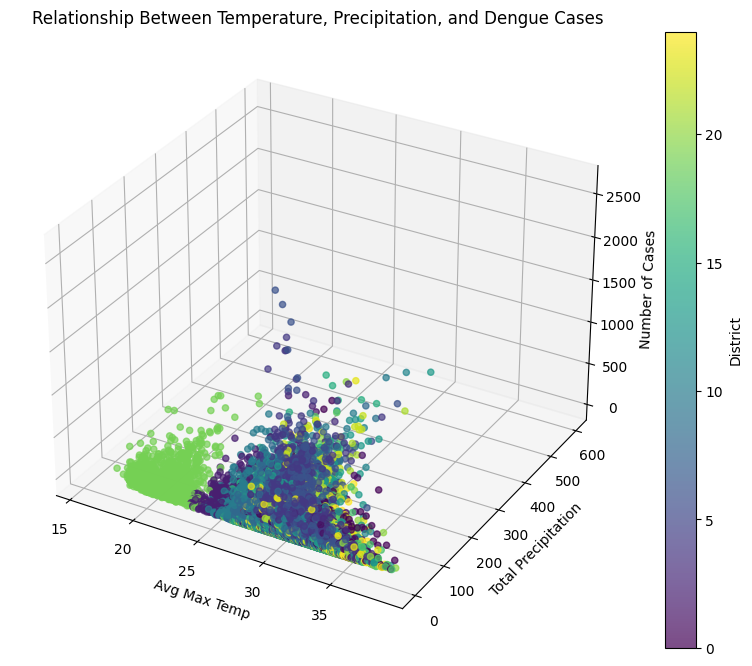

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color coding for districts
scatter = ax.scatter(df['Avg Max Temp (°C)'], df['Total Precipitation (mm)'], df['Number_of_Cases'],
                    c=df['District'].astype('category').cat.codes, cmap='viridis', alpha=0.7)

ax.set_xlabel('Avg Max Temp')
ax.set_ylabel('Total Precipitation')
ax.set_zlabel('Number of Cases')
ax.set_title('Relationship Between Temperature, Precipitation, and Dengue Cases')

# Add a color bar for districts
colorbar = fig.colorbar(scatter)
colorbar.set_label('District')

plt.show()

**22.Climate changes in Sri Lanka impacted the frequency and intensity of dengue outbreaks**


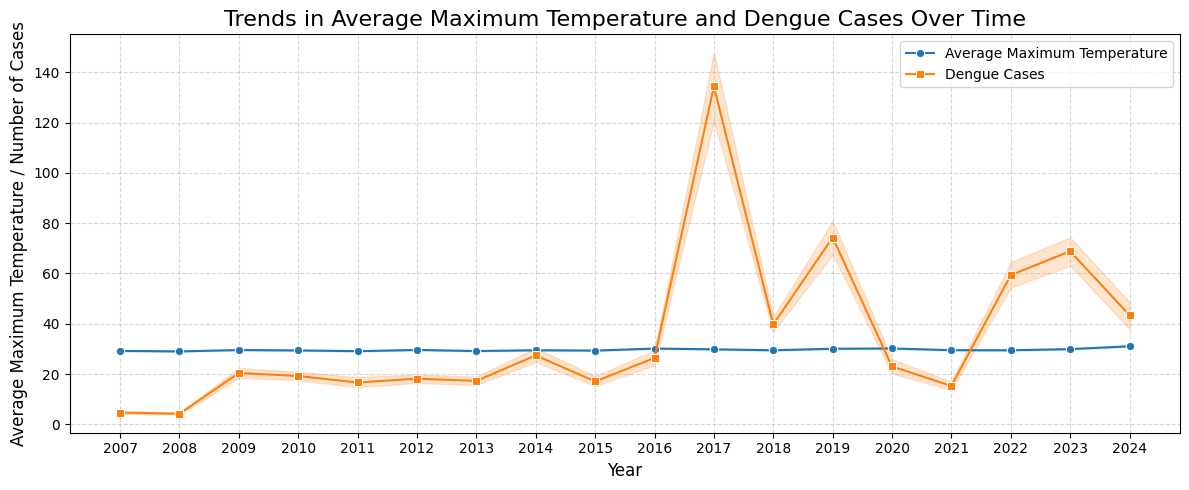

In [41]:

# Create a line plot with markers for average maximum temperature and dengue cases
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Year', y='Avg Max Temp (°C)', marker='o', label='Average Maximum Temperature')
sns.lineplot(data=df, x='Year', y='Number_of_Cases', marker='s', label='Dengue Cases')
plt.title('Trends in Average Maximum Temperature and Dengue Cases Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Maximum Temperature / Number of Cases', fontsize=12)
plt.legend()
plt.xticks(df['Year'].unique())
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**23 .  Relationship  BTW Avg Max temperature, Avg Min temperature and Density**

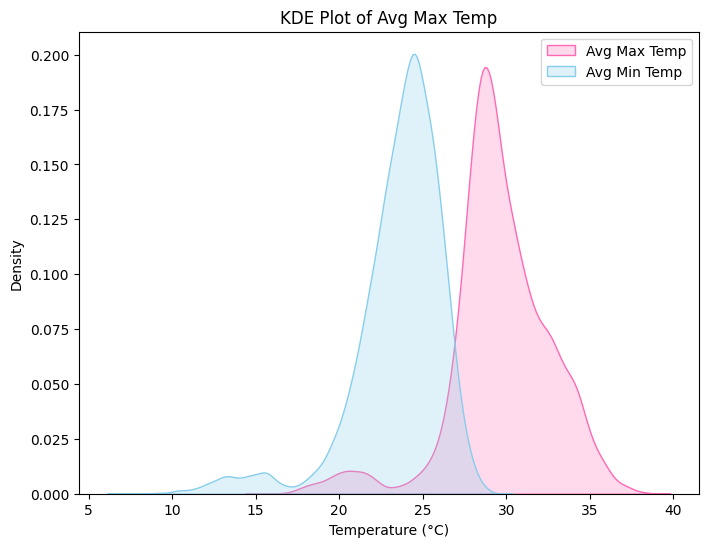

In [42]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Avg Max Temp (°C)'], shade=True, color='hotpink', label='Avg Max Temp')
sns.kdeplot(df['Avg Min Temp (°C)'], shade=True, color='skyblue', label='Avg Min Temp')

plt.title('KDE Plot of Avg Max Temp')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.legend()


plt.show()

**24.Impact of average maximum and minimum temperatures on dengue cases vary by District**

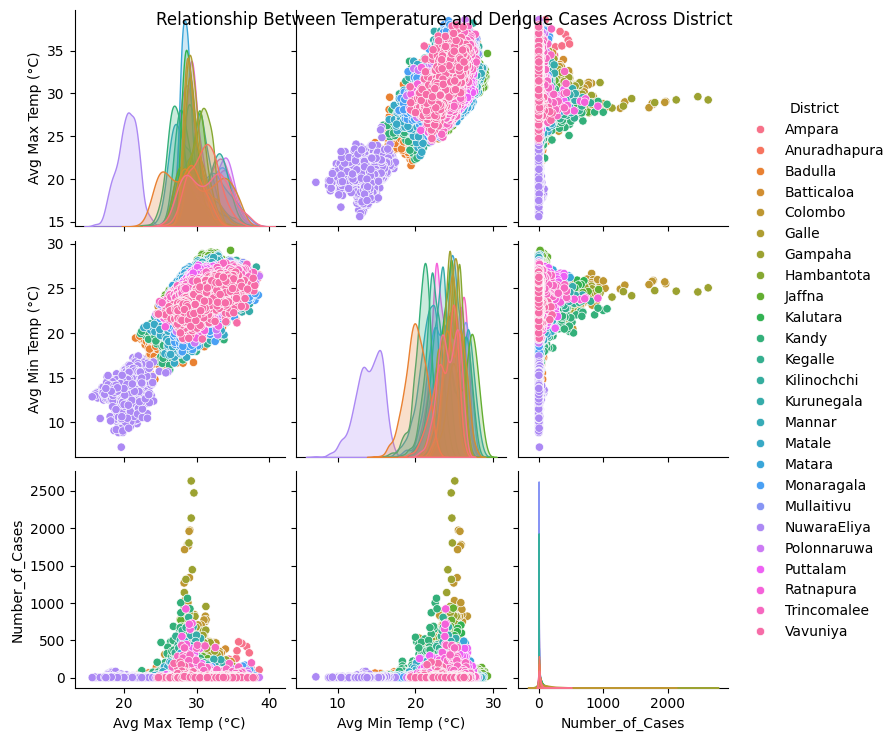

In [43]:


# Assuming you have a DataFrame 'df' with 'District', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)', and 'Number_of_Cases' columns

sns.pairplot(df[['Avg Max Temp (°C)', 'Avg Min Temp (°C)', 'Number_of_Cases', 'District']], hue='District', diag_kind='kde')
plt.suptitle('Relationship Between Temperature and Dengue Cases Across District')
plt.show()

In [44]:
# Assuming you have a DataFrame 'df' with 'Region', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)', and 'Number_of_Cases' columns

# Get unique District
District = df['District'].unique()

# Create scatter plots for each region
for District in District:
  District_df = df[df['District'] == District]
  plt.figure(figsize=(6, 4))
  sns.scatterplot(data=District_df, x='Avg Max Temp (°C)', y='Avg Min Temp (°C)', size='Number_of_Cases', hue='Number_of_Cases', palette='viridis', sizes=(20, 200))
  plt.title(f'Impact of Temperature on Dengue Cases in {District}', fontsize=16)
  plt.xlabel('Average Maximum Temperature (°C)', fontsize=12)
  plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)
  plt.tight_layout()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Plot Description:**

The plot compares the average maximum temperature (Avg Max Temp) and average minimum temperature (Avg Min Temp) against the number of dengue cases across various districts.

--------------------------------------------------------------------------

**Observation:**



*   Districts like Colombo, Gampaha, and Kalutara show a strong correlation between higher Avg Max Temp (°C) (around 28°C to 32°C) and an increased number of dengue cases.

*  Avg Min Temp (°C) generally ranges between 20°C and 25°C, with more dengue cases occurring in districts where the minimum temperature is closer to the upper limit of this range.




*   Some districts with lower Avg Max Temp (below 27°C) report fewer dengue cases, indicating that cooler districts may not experience dengue outbreaks as intensely as the warmer districts.



In [45]:
df.columns.to_list()

['District',
 'Number_of_Cases',
 'Week_Start_Date',
 'Month',
 'Year',
 'Week',
 'Week_End_Date',
 'Avg Max Temp (°C)',
 'Avg Min Temp (°C)',
 'Avg Apparent Max Temp (°C)',
 'Avg Apparent Min Temp (°C)',
 'Total Precipitation (mm)',
 'Total Rain (mm)',
 'Avg Wind Speed (km/h)',
 'Max Wind Gusts (km/h)',
 'Weather Code',
 'Avg Daylight Duration (hours)',
 'Avg Sunrise Time',
 'Avg Sunset Time',
 'Weather_Anomalies',
 'Cluster',
 'Precipitation Level',
 'Season',
 'Temperature Fluctuation']

Copy of Sri_lanka_dengue_cases_weekly_ffill_2007_2024_pre_processed.csv
-------------------------------------------------------------------------

In [46]:
df2 = pd.read_csv('/content/drive/MyDrive/All Data Set/Copy of Sri_lanka_dengue_cases_weekly_ffill_2007_2024_pre_processed.csv')
df2.head()

Year  Week District  Number_of_Cases Week_Start_Date  Year_from_Week  \
0  2007.0   1.0   Ampara                0      2007-01-01            2007   
1  2007.0   2.0   Ampara                0      2007-01-08            2007   
2  2007.0   3.0   Ampara                0      2007-01-15            2007   
3  2007.0   4.0   Ampara                0      2007-01-22            2007   
4  2007.0   5.0   Ampara                0      2007-01-29            2007   

   Week_from_Week  Month  
0               1      1  
1               2      1  
2               3      1  
3               4      1  
4               5      1

In [47]:
df2.isnull().sum()

Year               218
Week               218
District             0
Number_of_Cases      0
Week_Start_Date      0
Year_from_Week       0
Week_from_Week       0
Month                0
dtype: int64

In [48]:
df2.dropna(inplace=True)

visuaization

**a..Dengu Cases Over time**

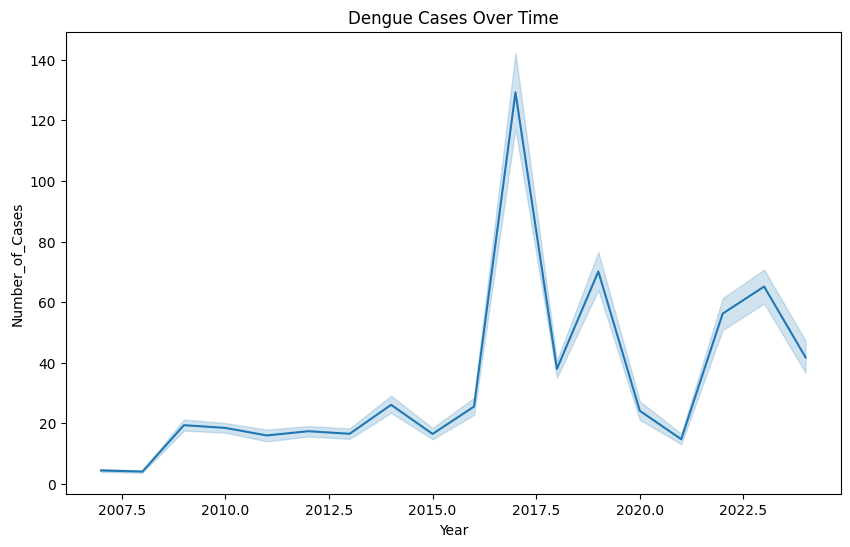

In [49]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Number_of_Cases', data=df2)
plt.xlabel('Year')
plt.ylabel('Number_of_Cases')
plt.title('Dengue Cases Over Time')
plt.show()

**b. Distribution of Dengu cases**

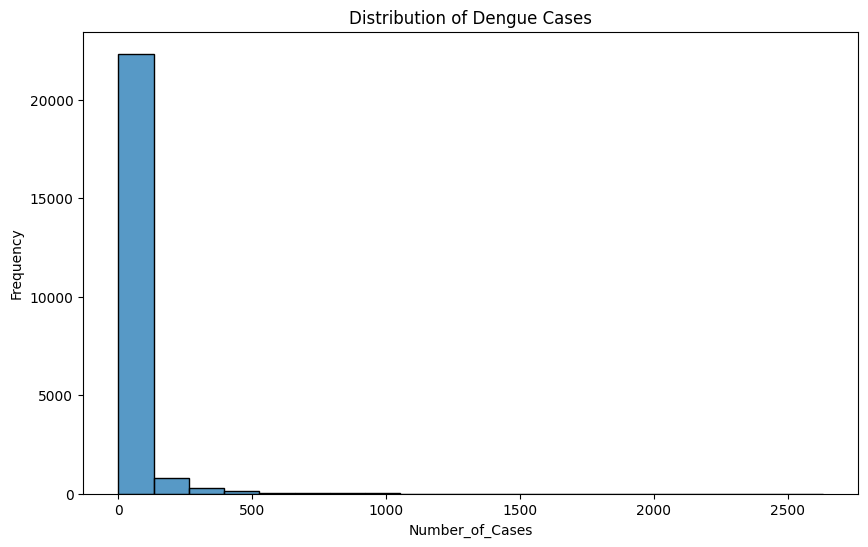

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Number_of_Cases'], bins=20)
plt.xlabel('Number_of_Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Dengue Cases')
plt.show()

population data

In [52]:
df1 = pd.read_csv('/content/drive/MyDrive/All Data Set/population_data[2007-2023] (2).csv')
df1.head()

year  total_population district
0  2007           2270352  Colombo
1  2008           2284182  Colombo
2  2009           2298012  Colombo
3  2010           2311842  Colombo
4  2011           2325673  Colombo

**c.Total Population by District**

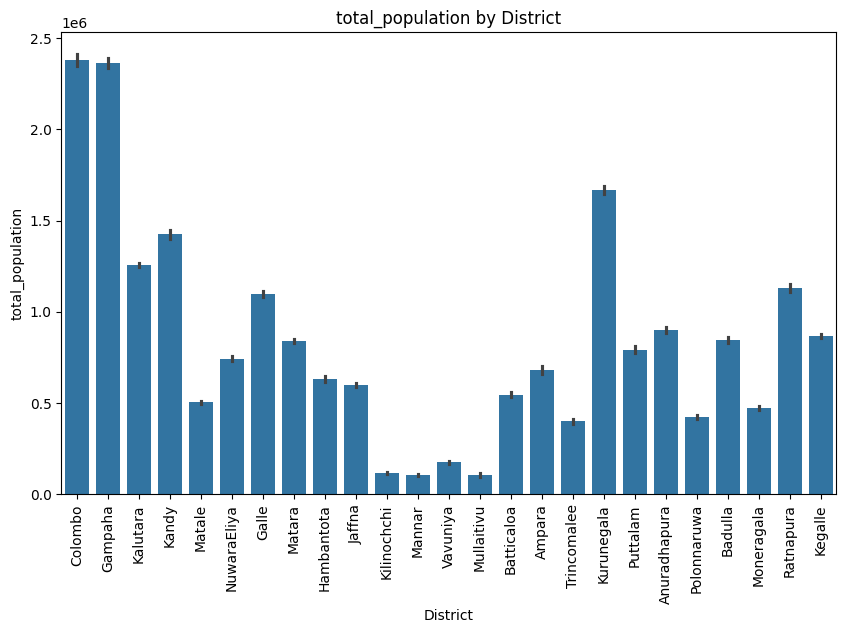

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='district', y='total_population', data=df1)
plt.xlabel('District')
plt.ylabel('total_population')
plt.title('total_population by District')
plt.xticks(rotation=90)
plt.show()

**d.Total Population by District & Year**  

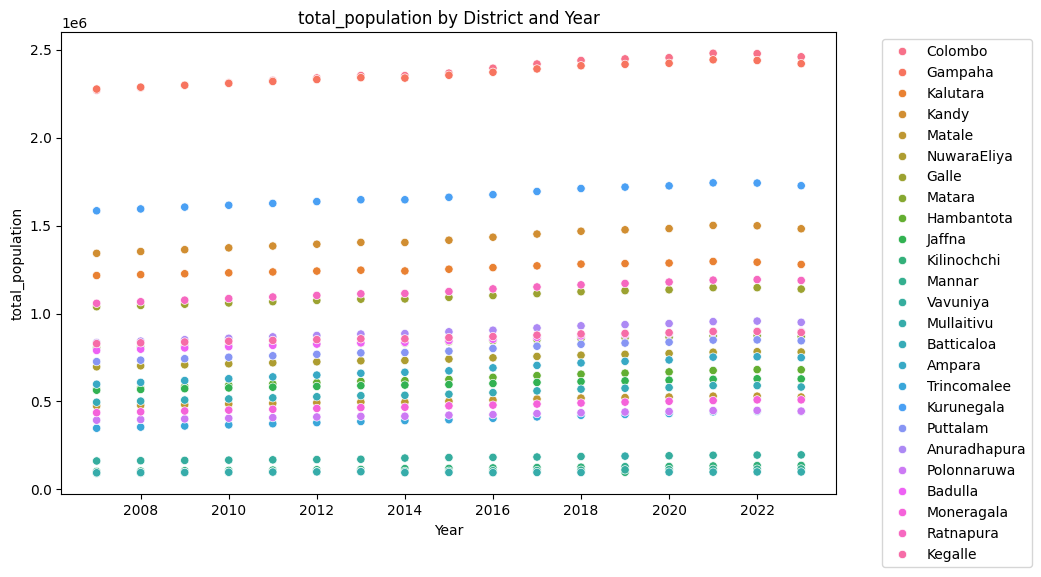

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='total_population', hue='district', data=df1)
plt.xlabel('Year')
plt.ylabel('total_population')
plt.title('total_population by District and Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Merge Data
---------------

In [55]:
# Rename the 'district' column in df1 to 'District'
df1.rename(columns={'district': 'District'}, inplace=True)
df1.rename(columns={'year': 'Year'}, inplace=True)


# Merge df and df1 on 'District' and 'Year'
merged_df = pd.merge(df2, df1, on=['District', 'Year'])

**e.Dengu Cases over time**

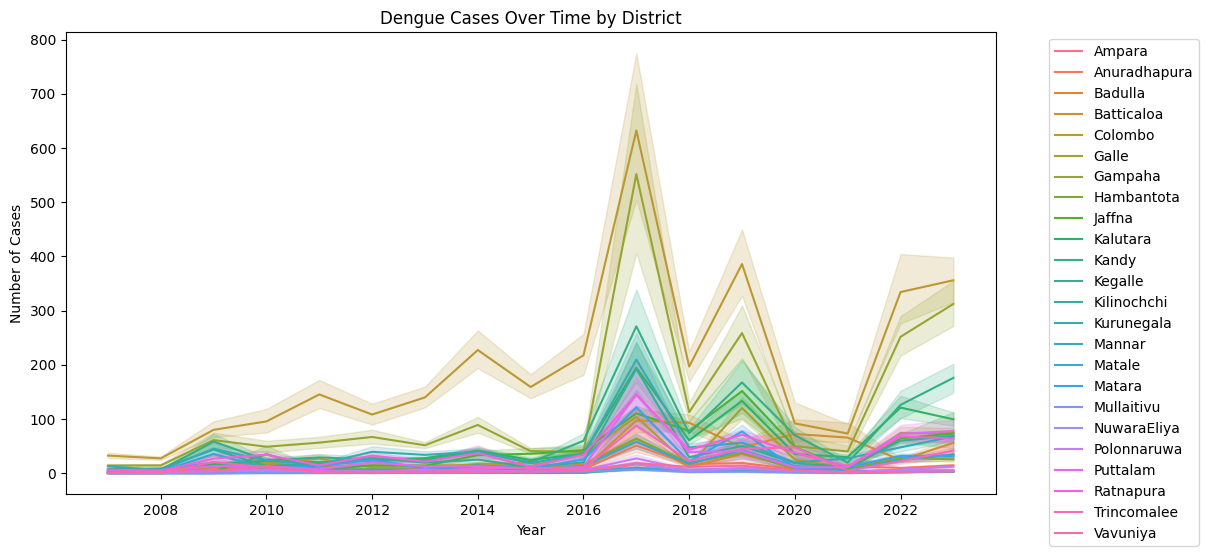

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number_of_Cases', hue='District', data=merged_df)
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Dengue Cases Over Time by District')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**f..Dengu Cases Vs.Population By District**

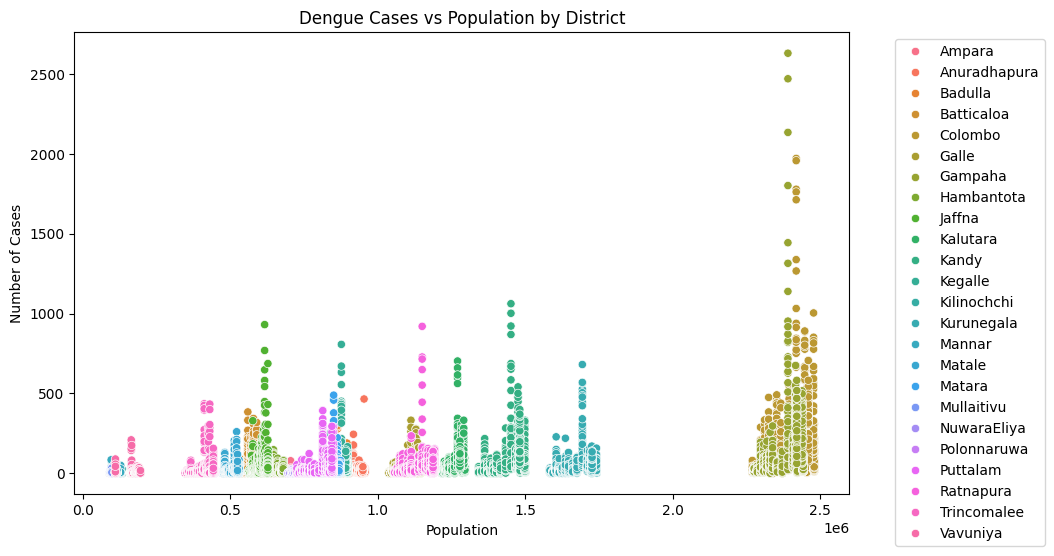

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_population', y='Number_of_Cases', hue='District', data=merged_df)
plt.xlabel('Population')
plt.ylabel('Number of Cases')
plt.title('Dengue Cases vs Population by District')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**G..Dengu Cases By District and Year**

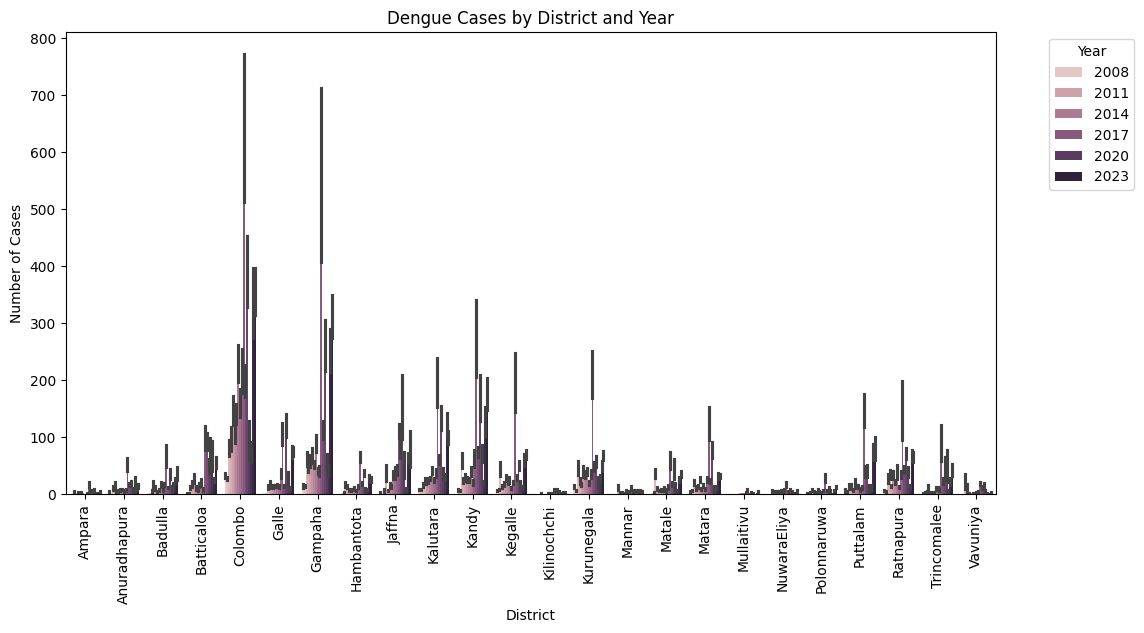

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='Number_of_Cases', hue='Year', data=merged_df)
plt.xlabel('District')
plt.ylabel('Number of Cases')
plt.title('Dengue Cases by District and Year')
plt.xticks(rotation=90)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**H..Distribution of Dengu Cases**

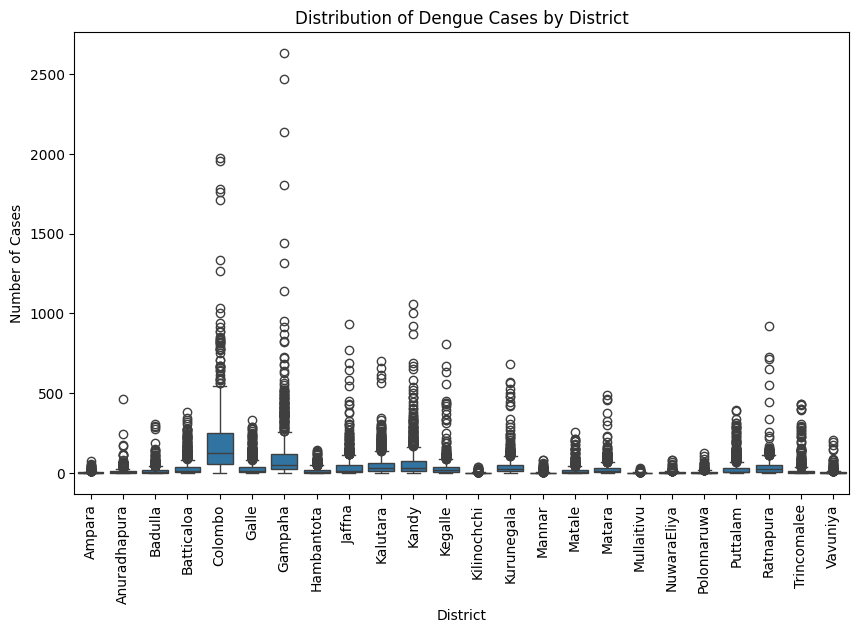

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='District', y='Number_of_Cases', data=merged_df)
plt.xlabel('District')
plt.ylabel('Number of Cases')
plt.title('Distribution of Dengue Cases by District')
plt.xticks(rotation=90)
plt.show()

**I..Total Population and Dengu Cases**

In [61]:
district_data = merged_df.groupby('District').agg({'total_population': 'sum', 'Number_of_Cases': 'sum'})

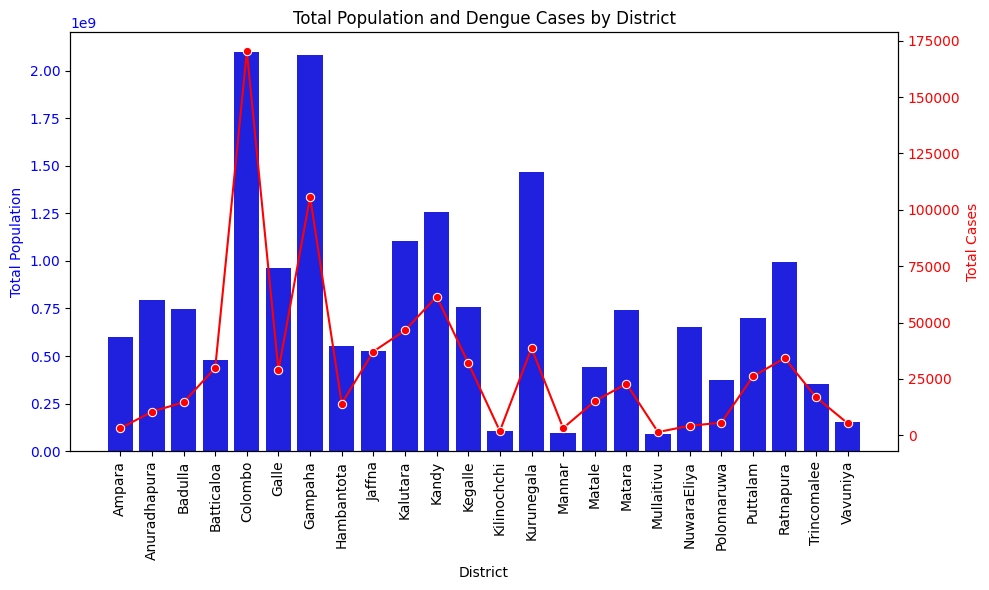

In [62]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total population
sns.barplot(x=district_data.index, y=district_data['total_population'], color='blue', ax=ax1)
ax1.set_xlabel('District')
ax1.set_ylabel('Total Population', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Create a second y-axis
ax2 = ax1.twinx()

# Line plot for total cases
sns.lineplot(x=district_data.index, y=district_data['Number_of_Cases'], color='red', marker='o', ax=ax2)
ax2.set_ylabel('Total Cases', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Total Population and Dengue Cases by District')
plt.tight_layout()
plt.show()

**J..Distribution Of Dengu Cases by District**

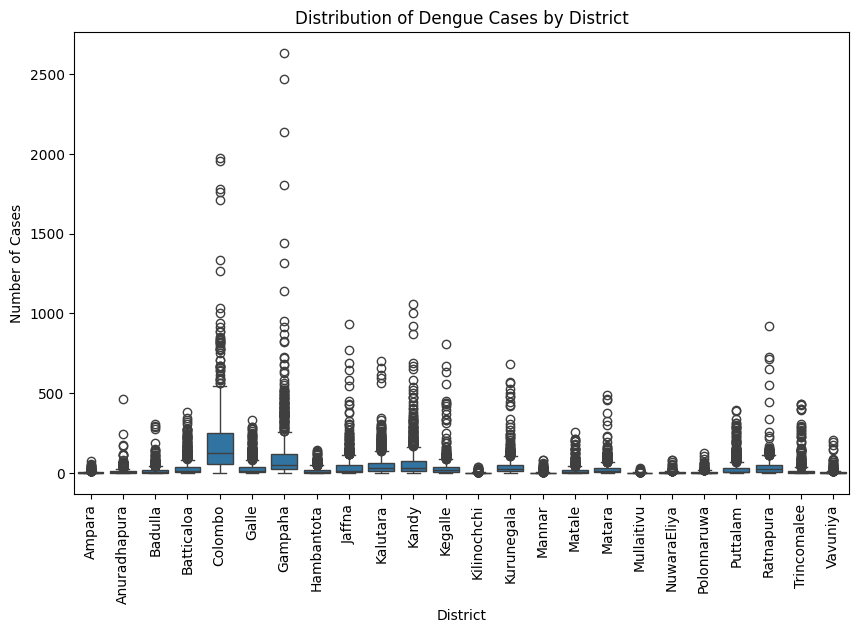

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='District', y='Number_of_Cases', data=merged_df)
plt.xlabel('District')
plt.ylabel('Number of Cases')
plt.title('Distribution of Dengue Cases by District')
plt.xticks(rotation=90)
plt.show()

**K..Pairplot For Relationship**

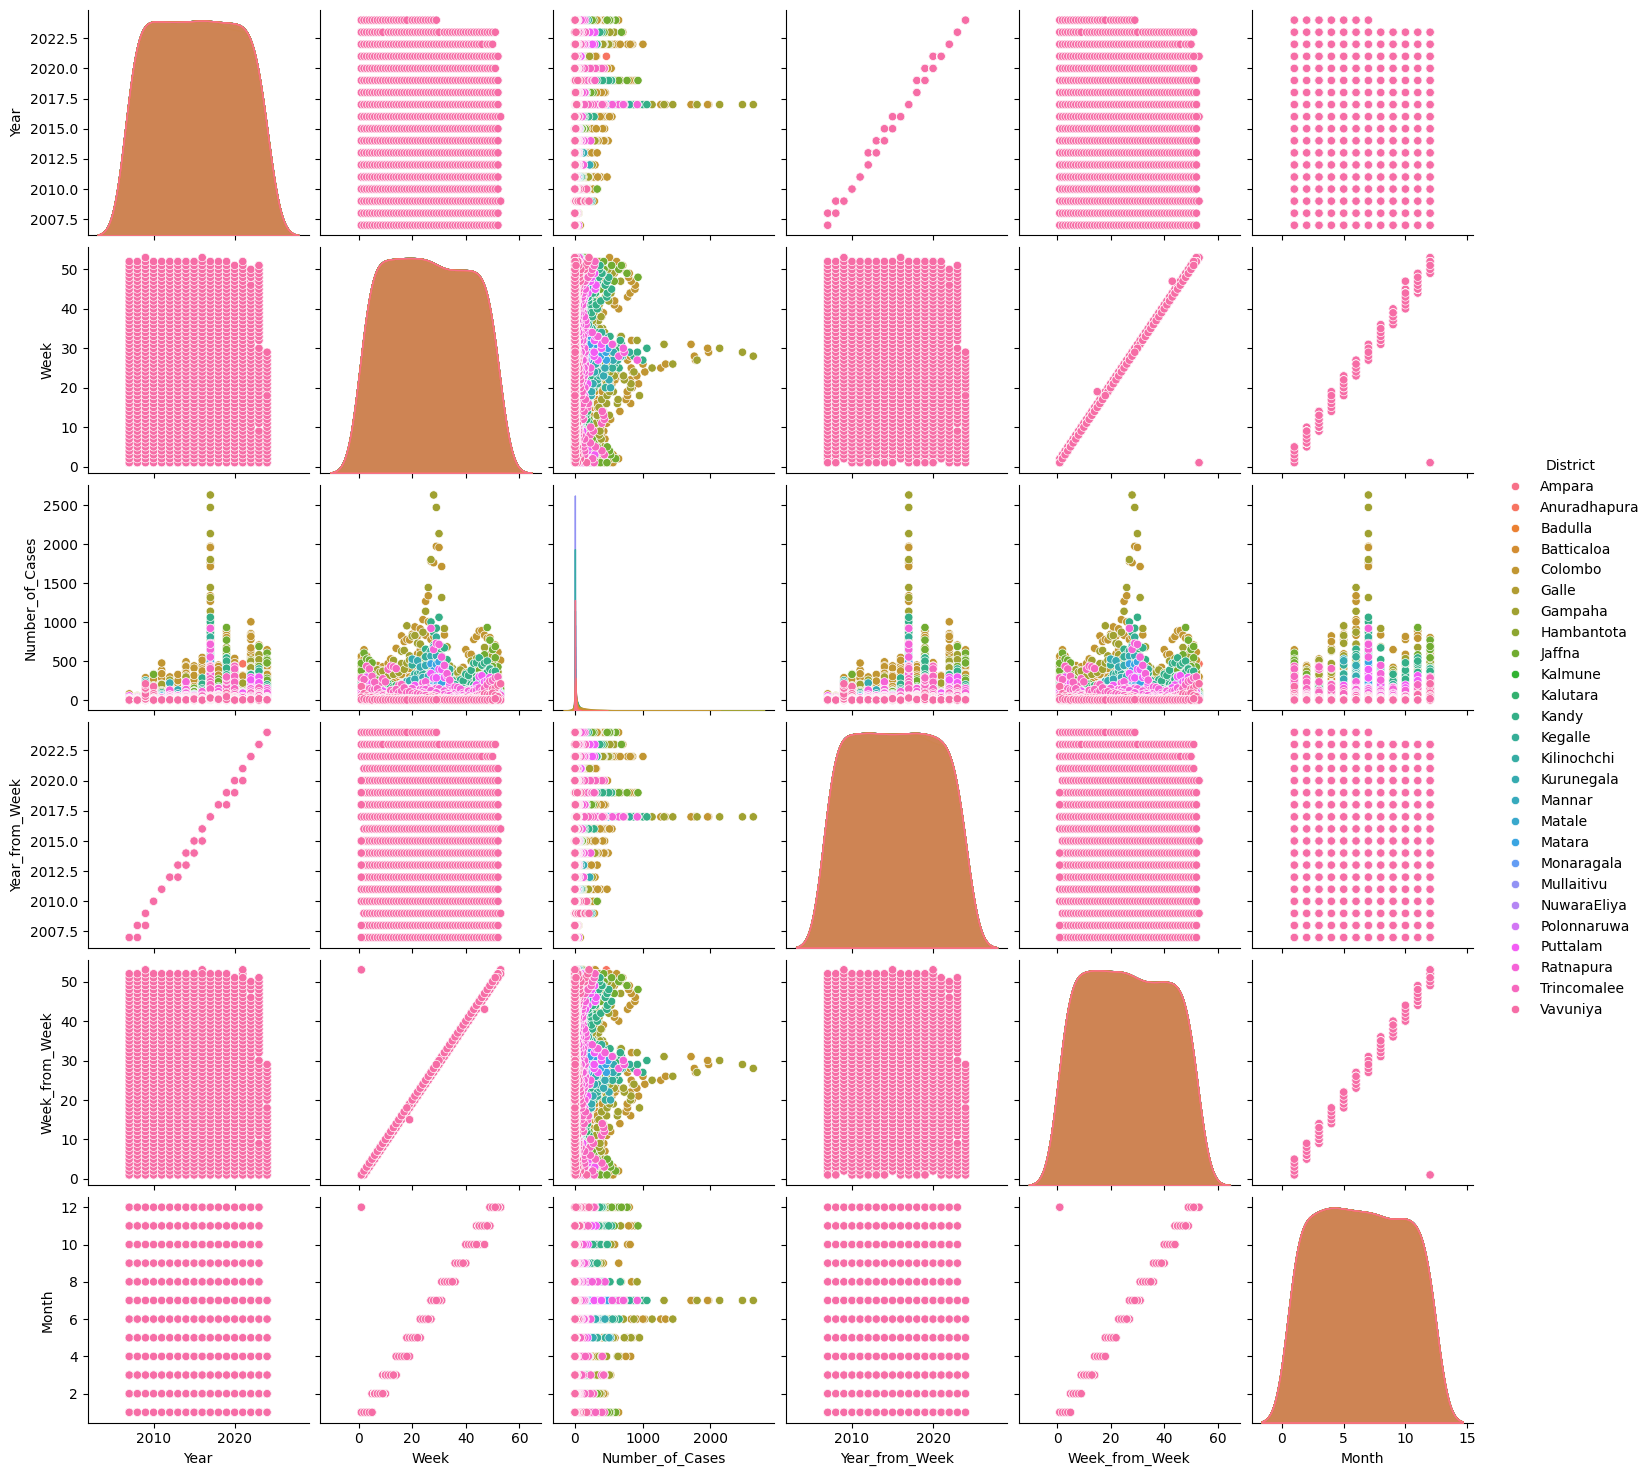

In [64]:
sns.pairplot(df2, hue='District', diag_kind='kde')
plt.show()

**Analysis**
-----------------------------------------------------

----------------------------------------------------


*   The analysis of dengue cases in Sri Lanka from 2007 to 2024 shows a strong link between weather conditions

*    The highest number of cases occurred in 2017, with surges typically seen in mid-year months like July, coinciding with the monsoon season.


*    Districts such as Colombo, Gampaha, and Kalutara are at higher risk due to elevated temperatures (28°C-32°C) and heavy rainfall.








-------------------------------------------------------------------------------







**Suggestions for Reducing Dengue Cases:**
---------------------------------------------

-----------------------------------------------------------------------------


1.   **Implement Water Drainage Programs:**   Since high precipitation leads to more breeding sites for mosquitoes, especially in monsoon-prone areas, regular cleaning and drainage of stagnant water should be prioritized in high-risk districts like Colombo and Gampaha.



2.   **Temperature Monitoring & Alerts:**   Districts experiencing high temperatures (above 30°C) should have temperature monitoring systems to provide early warnings when conditions are favorable for mosquito breeding. Public health measures, such as spraying insecticides, can be initiated when these thresholds are reached.


3.  **Public Awareness Campaigns:** Focus on educating communities in vulnerable districts about household mosquito control measures, particularly during high-risk months like July, to reduce exposure to dengue.


4.  **Integrated Vector Management:** Invest in environmentally friendly mosquito control, such as introducing natural predators or deploying mosquito traps, particularly in districts with both high temperatures and heavy rainfall.





5.   **Health Infrastructure Improvement:**    Enhance health facilities' capacity to respond to outbreaks quickly by deploying mobile clinics and preventive health checkups in regions identified as high risk.




-------------------------------------------------------------------------------